Purpose: 
To help LoanTap in Individual creditline underwriting process.
(this is one of teh dumbest approach, just to try something)
my personal objectives:
1. try using capping technique for outlier treatment
2. use stats model logit method for logistic regression
3. subsequently run the whole process using sklearn and compare the results


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder



In [2]:
# Load the dataset
data = pd.read_csv('LoanTapData.csv')

In [3]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status
0,10000,36,11.44,329.48,B,B4,Marketing,15.0,RENT,117000.0,...,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",Fully Paid
1,8000,36,11.99,265.68,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,...,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",Fully Paid
2,15600,36,10.49,506.97,B,B3,Statistician,0.5,RENT,43057.0,...,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",Fully Paid
3,7200,36,6.49,220.65,A,A2,Client Advocate,6.0,RENT,54000.0,...,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",Fully Paid
4,24375,60,17.27,609.33,C,C5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,...,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",Charged Off


In [4]:
# Checking the structure of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  int64  
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  float64
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394274 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [5]:
# Checking for missing values
print(data.isnull().sum())

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_status                 0
dtype: int64


In [6]:
# Handling missing values
data['emp_length'].fillna(data['emp_length'].median(), inplace=True)  # Filling numerical missing values with median


In [7]:
# Handling missing values
data['revol_util'].fillna(data['revol_util'].median(), inplace=True)  # Filling numerical missing values with median


In [8]:
# Handling missing values
data['mort_acc'].fillna(data['mort_acc'].median(), inplace=True)  # Filling numerical missing values with median


In [9]:
# Handling missing values
data['pub_rec_bankruptcies'].fillna(data['pub_rec_bankruptcies'].median(), inplace=True)  # Filling numerical missing values with median


In [10]:
# Checking for missing values
print(data.isnull().sum())

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies        0
address                     0
loan_status                 0
dtype: int64


In [11]:
# Handling missing values
data['emp_title'].fillna('Unknown', inplace=True)  # Filling categorical missing values with 'Unknown'

In [12]:
# Handling missing values
data['title'].fillna('Unknown', inplace=True)  # Filling categorical missing values with 'Unknown'

In [13]:
# Checking for missing values
print(data.isnull().sum())

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_status             0
dtype: int64


In [14]:
# Statistical summary of the dataset
print(data.describe())

           loan_amnt           term       int_rate    installment  \
count  396030.000000  396030.000000  396030.000000  396030.000000   
mean    14113.888089      41.698053      13.639400     431.849698   
std      8357.441341      10.212038       4.472157     250.727790   
min       500.000000      36.000000       5.320000      16.080000   
25%      8000.000000      36.000000      10.490000     250.330000   
50%     12000.000000      36.000000      13.330000     375.430000   
75%     20000.000000      36.000000      16.490000     567.300000   
max     40000.000000      60.000000      30.990000    1533.810000   

          emp_length    annual_inc            dti       open_acc  \
count  396030.000000  3.960300e+05  396030.000000  396030.000000   
mean        7.572776  7.420318e+04      17.379514      11.311153   
std         5.516590  6.163762e+04      18.019092       5.137649   
min         0.500000  0.000000e+00       0.000000       0.000000   
25%         3.000000  4.500000e+04    

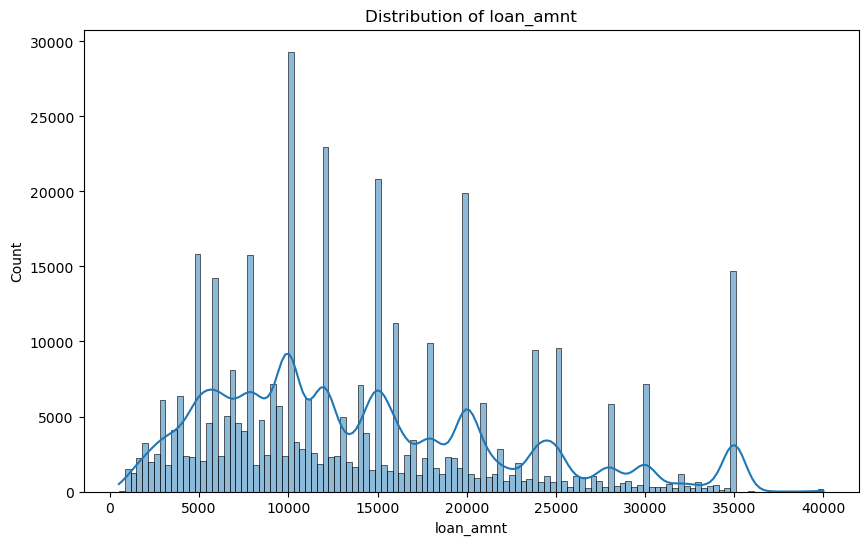

In [15]:
# Distribution plots for continuous variables
continuous_features = ['loan_amnt']
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

### Generally loan amounts are smaller; higher the loan amount-lesser the number of such loans; box plot method will be used for outlier detection and treatment.

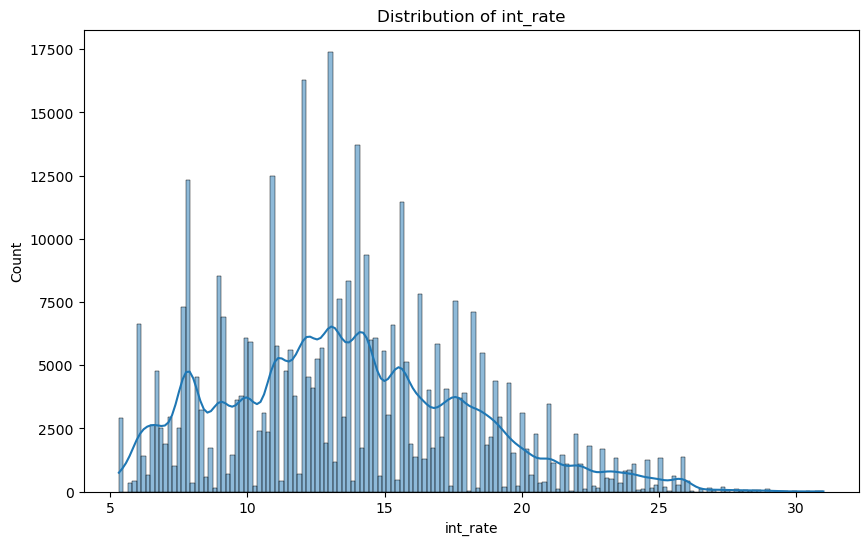

In [16]:
# Distribution plots for continuous variables
continuous_features = ['int_rate']
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

### interest rates show predominantly normal distribution even though right tail is bit elongated; very low interest rates are less in number and similarly high to very high interest rates are considerably less in number

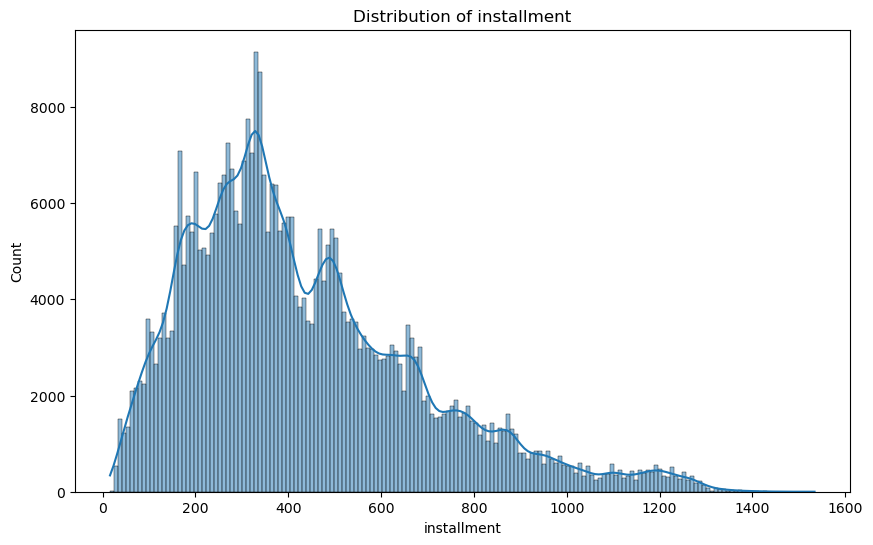

In [17]:
# Distribution plots for continuous variables
continuous_features = ['installment']
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

### very low installments are less in number; fewer and fewer higher installments are seen which makes the distribution right tailed; majority of teh installments are seen in in the range ~200 to 800

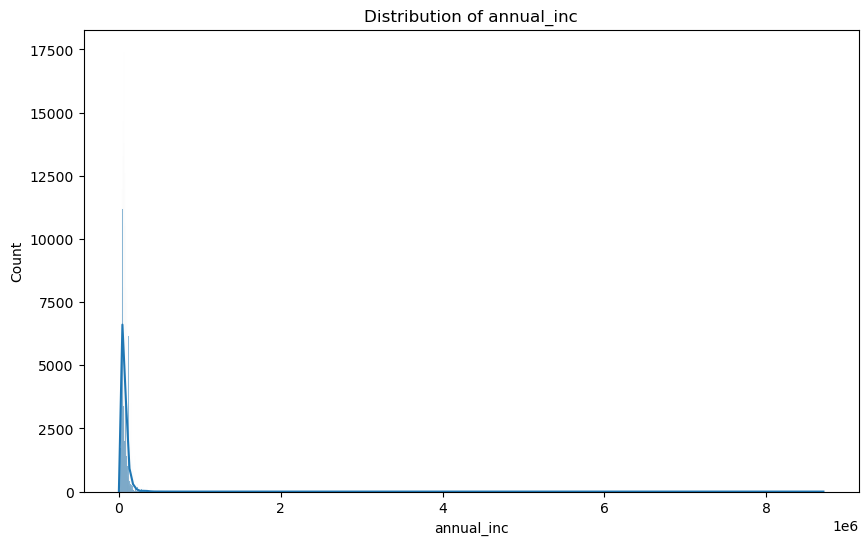

In [18]:
# Distribution plots for continuous variables
continuous_features = ['annual_inc']
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

### very few people are having very high annual incomes; most of the people have ~1e6 annual income

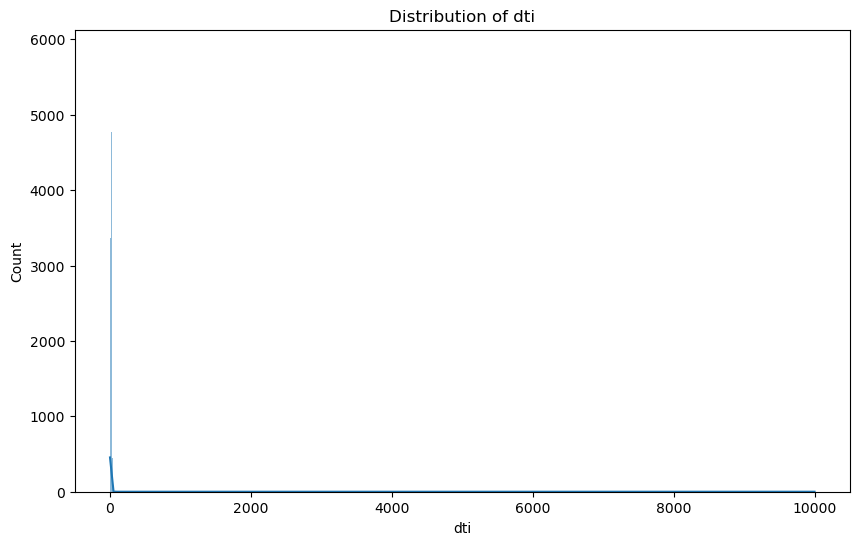

In [19]:
# Distribution plots for continuous variables
continuous_features = ['dti']
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

### dti is better analysed using box plot (subsequent sections); however majority of dts are near zeroeventhough there are a few higher values

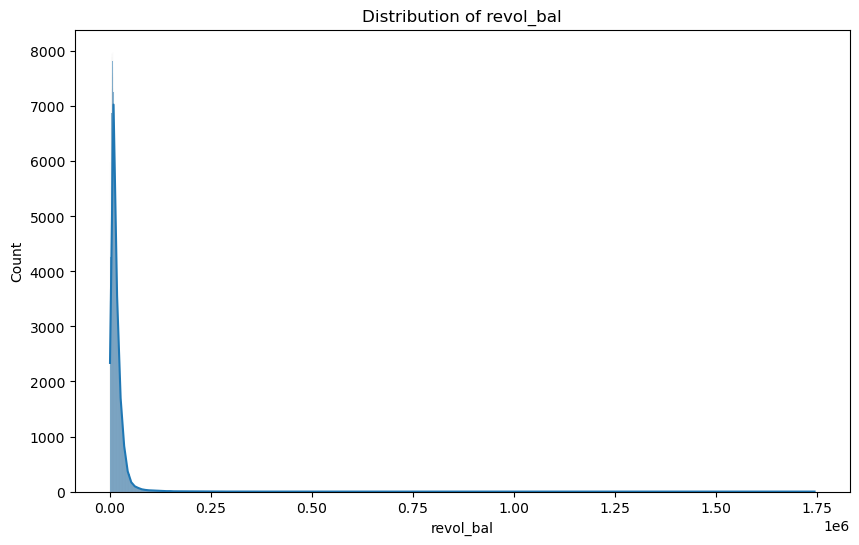

In [20]:
# Distribution plots for continuous variables
continuous_features = ['revol_bal']
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

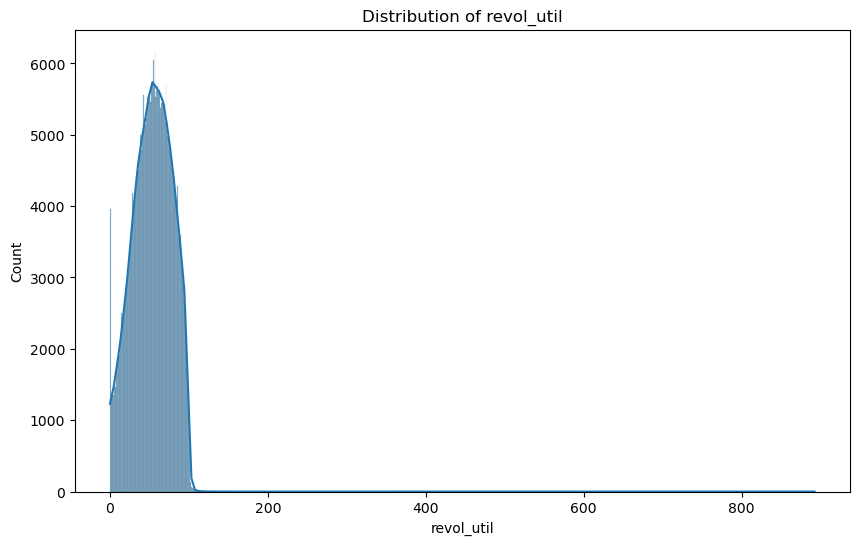

In [21]:
# Distribution plots for continuous variables
continuous_features = ['revol_util']
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

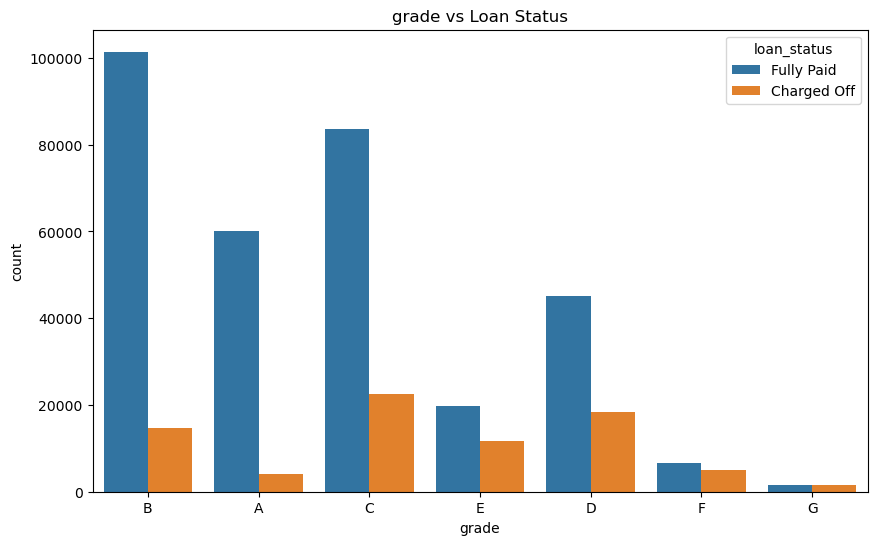

In [22]:
# Box plots for categorical variables against target variable
categorical_features = ['grade']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, hue='loan_status')
    plt.title(f'{feature} vs Loan Status')
    plt.show()

### B, C, D grades are having higher charged off cases; G, A, F are having very less charged off cases; B, C A D also show very high fully paid cases

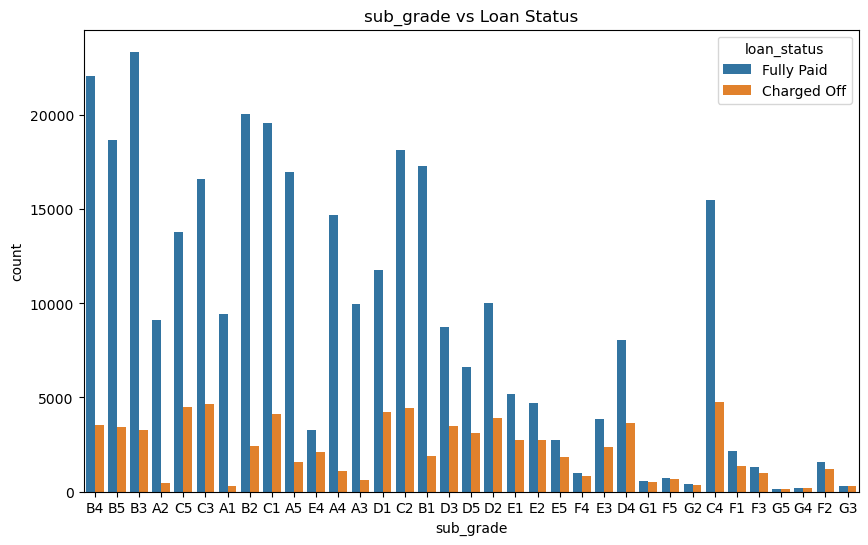

In [23]:
# Box plots for categorical variables against target variable
categorical_features = ['sub_grade']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, hue='loan_status')
    plt.title(f'{feature} vs Loan Status')
    plt.show()

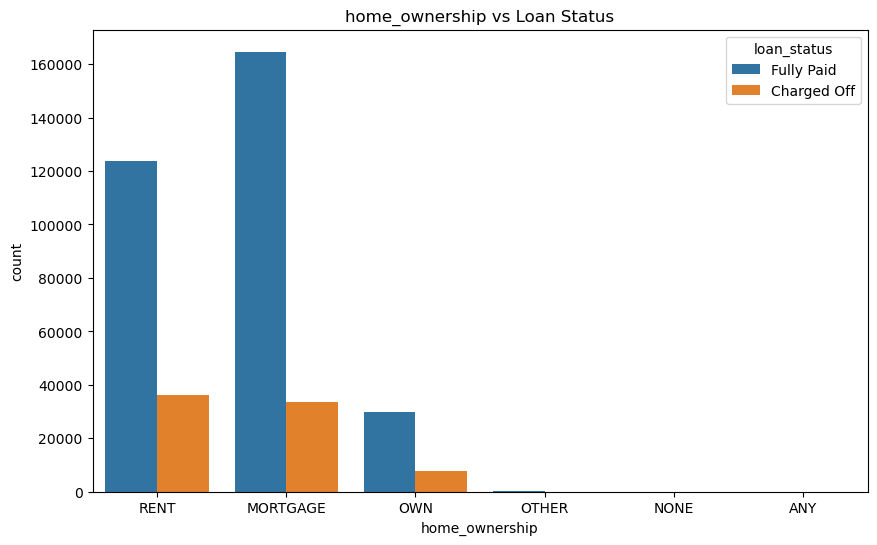

In [24]:
# Box plots for categorical variables against target variable
categorical_features = ['home_ownership']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, hue='loan_status')
    plt.title(f'{feature} vs Loan Status')
    plt.show()

### home ownership type mortgage is highest in number followed by rent type

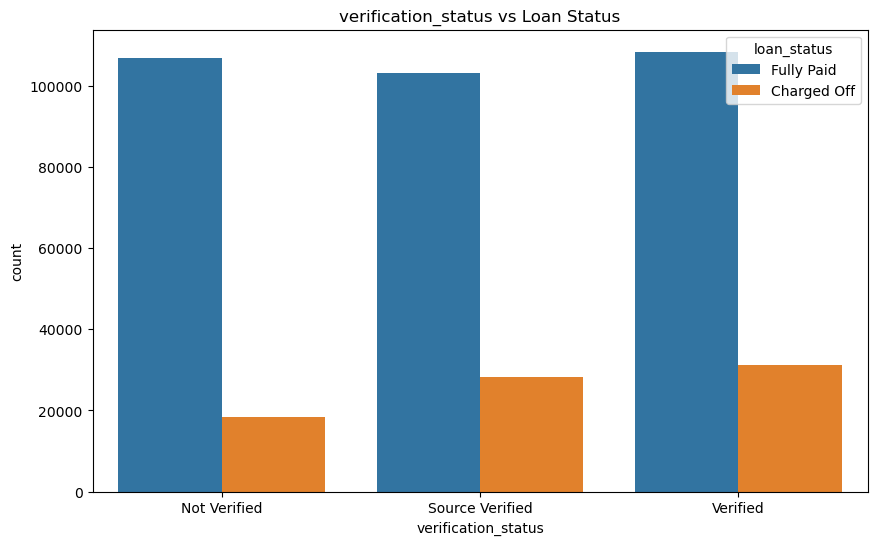

In [25]:
# Box plots for categorical variables against target variable
categorical_features = ['verification_status']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, hue='loan_status')
    plt.title(f'{feature} vs Loan Status')
    plt.show()

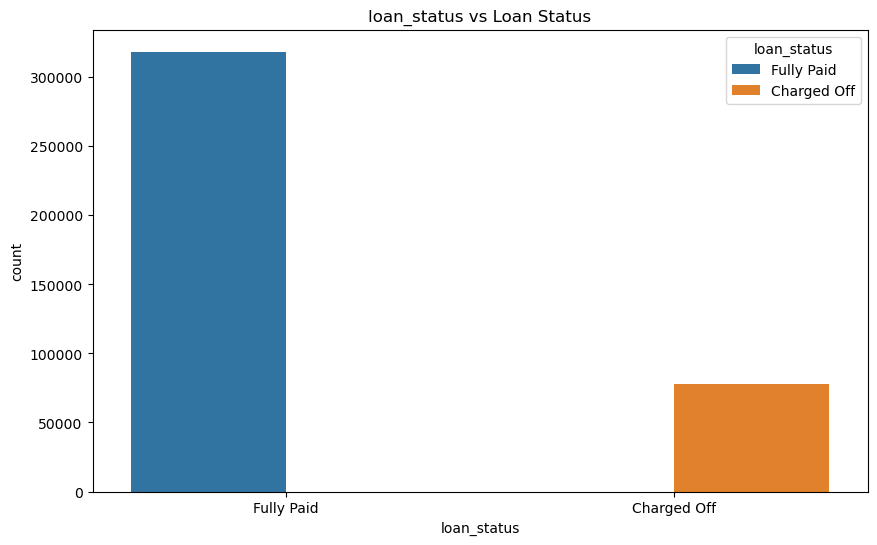

In [26]:
# Box plots for categorical variables against target variable
categorical_features = ['loan_status']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, hue='loan_status')
    plt.title(f'{feature} vs Loan Status')
    plt.show()

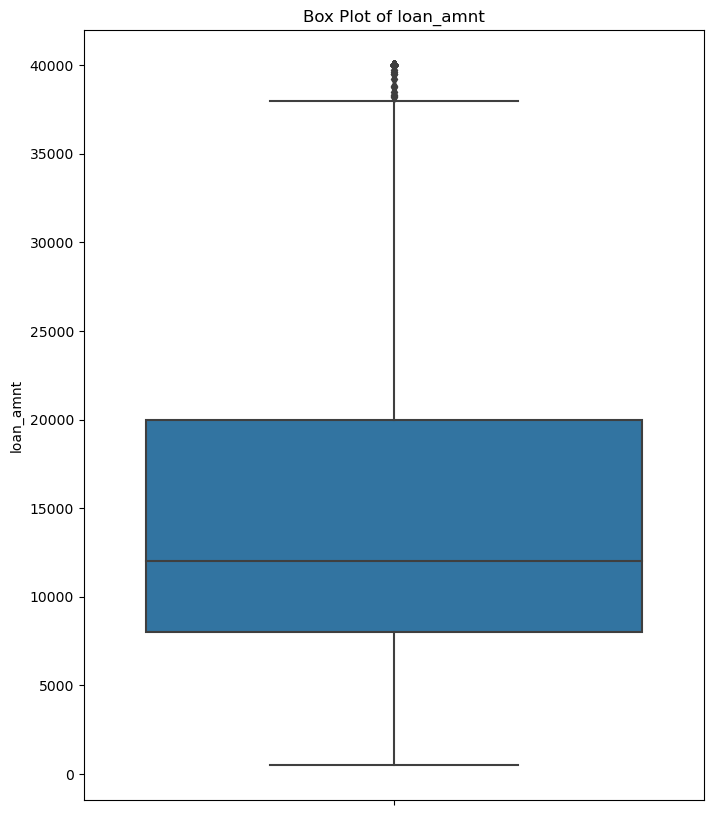

In [27]:
# Box Plot for loan_amnt
plt.figure(figsize=(8, 10))
sns.boxplot(y=data['loan_amnt'])
plt.title('Box Plot of loan_amnt')
plt.show()

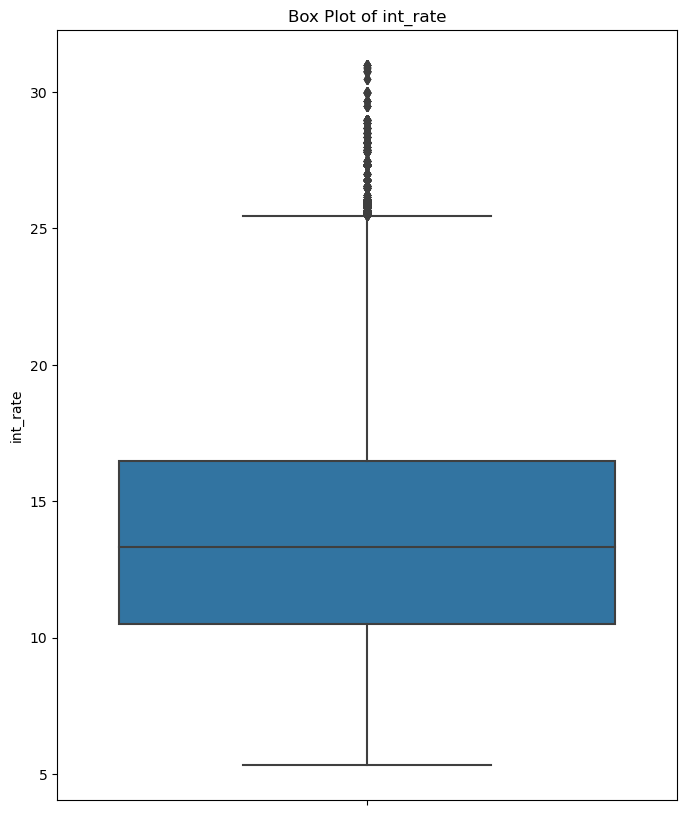

In [28]:
# Box Plot for int_rate
plt.figure(figsize=(8, 10))
sns.boxplot(y=data['int_rate'])
plt.title('Box Plot of int_rate')
plt.show()

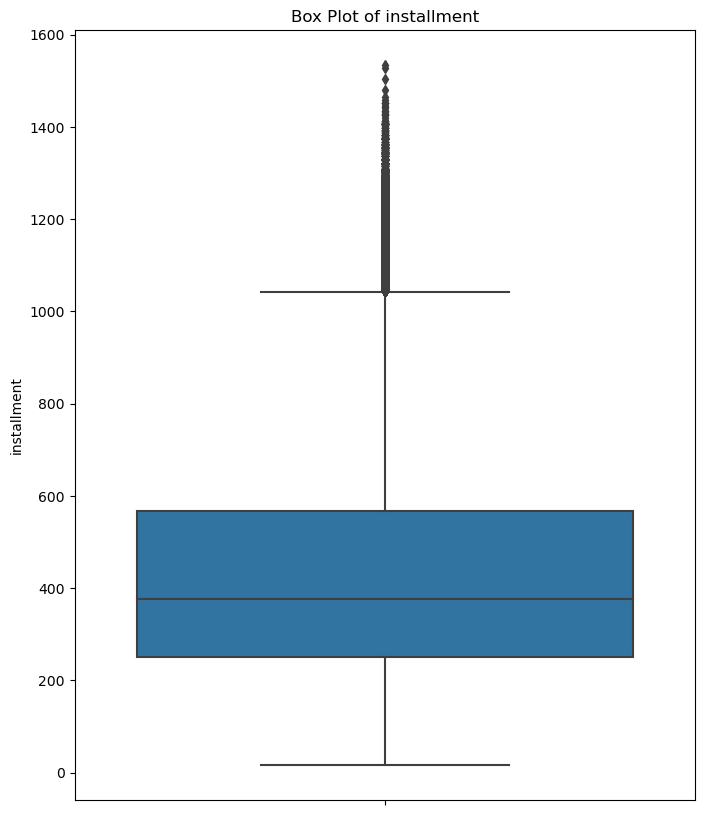

In [29]:
# Box Plot for installment
plt.figure(figsize=(8, 10))
sns.boxplot(y=data['installment'])
plt.title('Box Plot of installment')
plt.show()

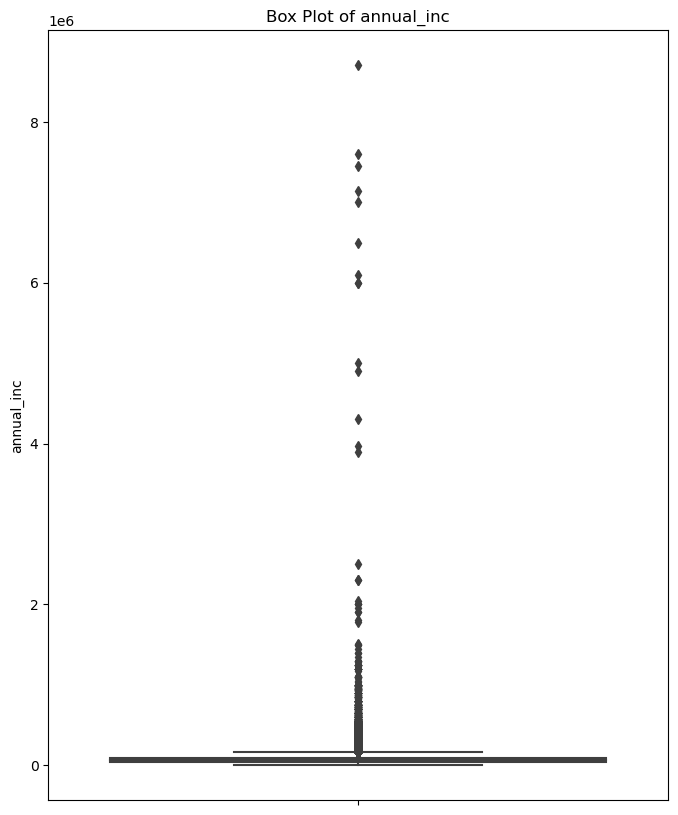

In [30]:
# Box Plot for annual_inc
plt.figure(figsize=(8, 10))
sns.boxplot(y=data['annual_inc'])
plt.title('Box Plot of annual_inc')
plt.show()

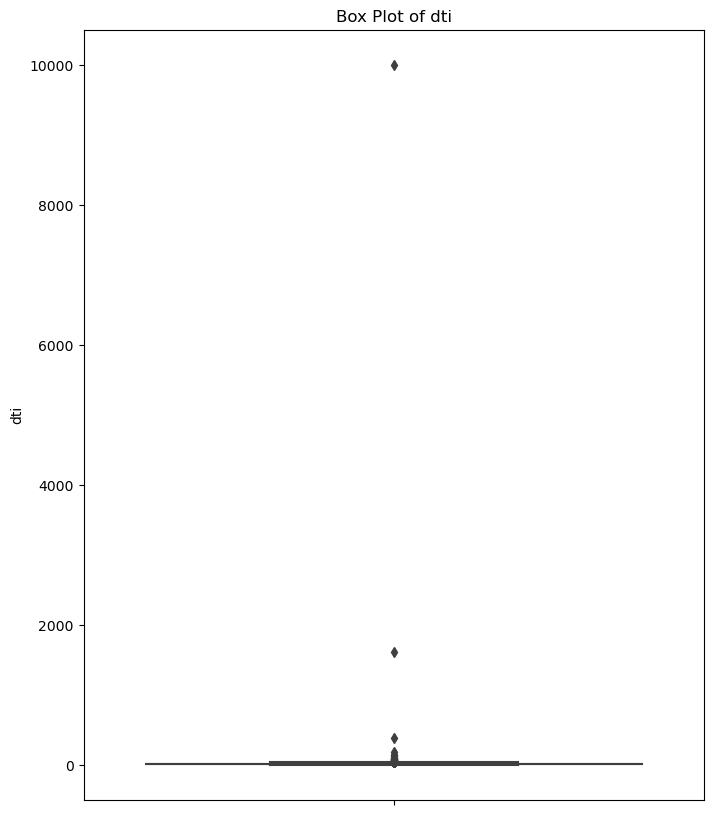

In [31]:
# Box Plot for dti
plt.figure(figsize=(8, 10))
sns.boxplot(y=data['dti'])
plt.title('Box Plot of dti')
plt.show()


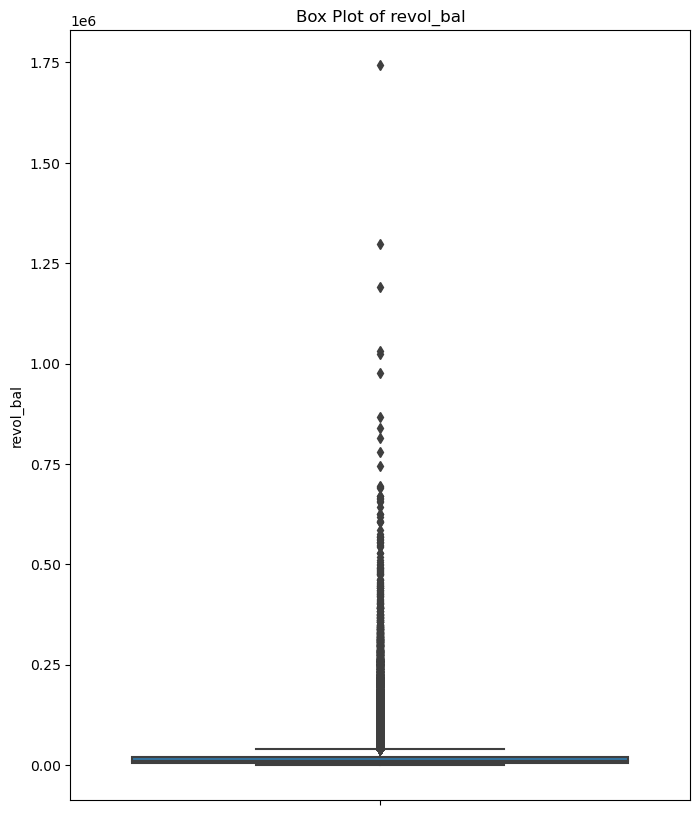

In [32]:
# Box Plot for revol_bal
plt.figure(figsize=(8, 10))
sns.boxplot(y=data['revol_bal'])
plt.title('Box Plot of revol_bal')
plt.show()

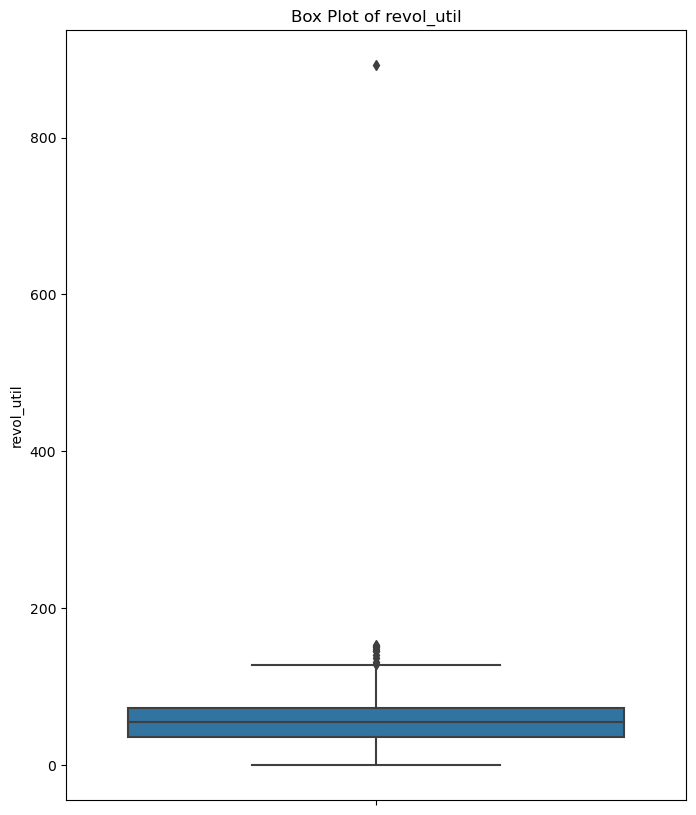

In [33]:
# Box Plot for revol_util
plt.figure(figsize=(8, 10))
sns.boxplot(y=data['revol_util'])
plt.title('Box Plot of revol_util')
plt.show()

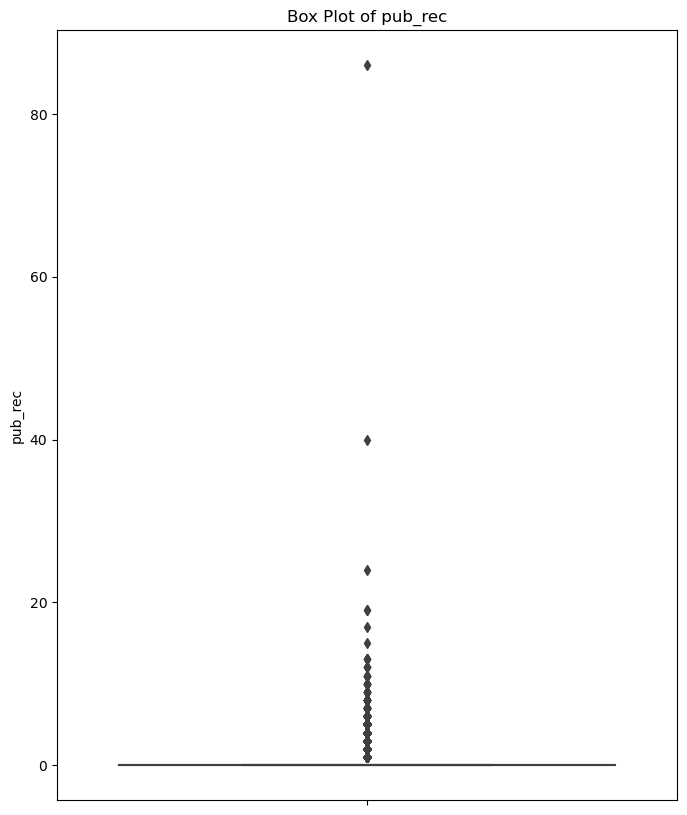

In [34]:
# Box Plot for pub_rec
plt.figure(figsize=(8, 10))
sns.boxplot(y=data['pub_rec'])
plt.title('Box Plot of pub_rec')
plt.show()

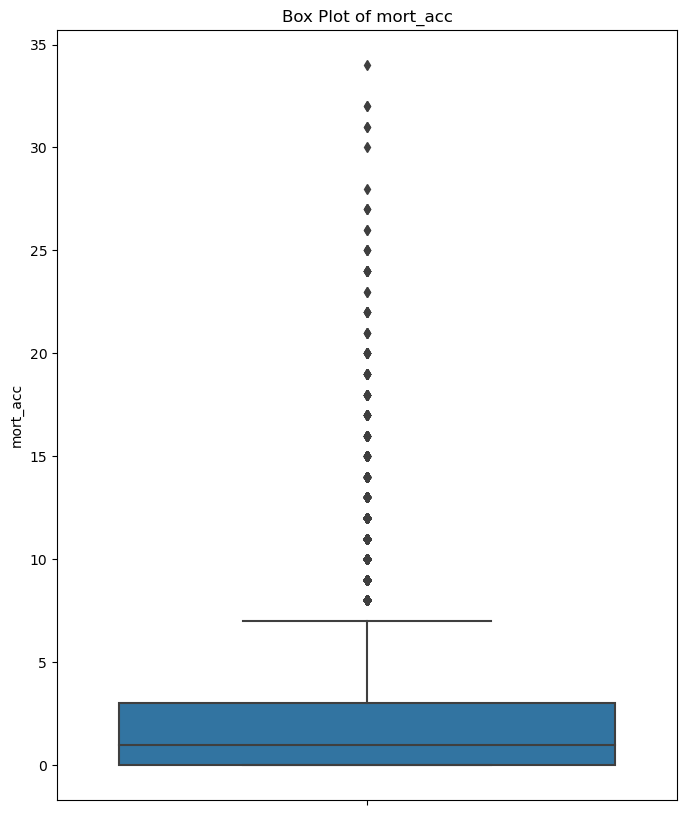

In [35]:
# Box Plot for mort_acc
plt.figure(figsize=(8, 10))
sns.boxplot(y=data['mort_acc'])
plt.title('Box Plot of mort_acc')
plt.show()

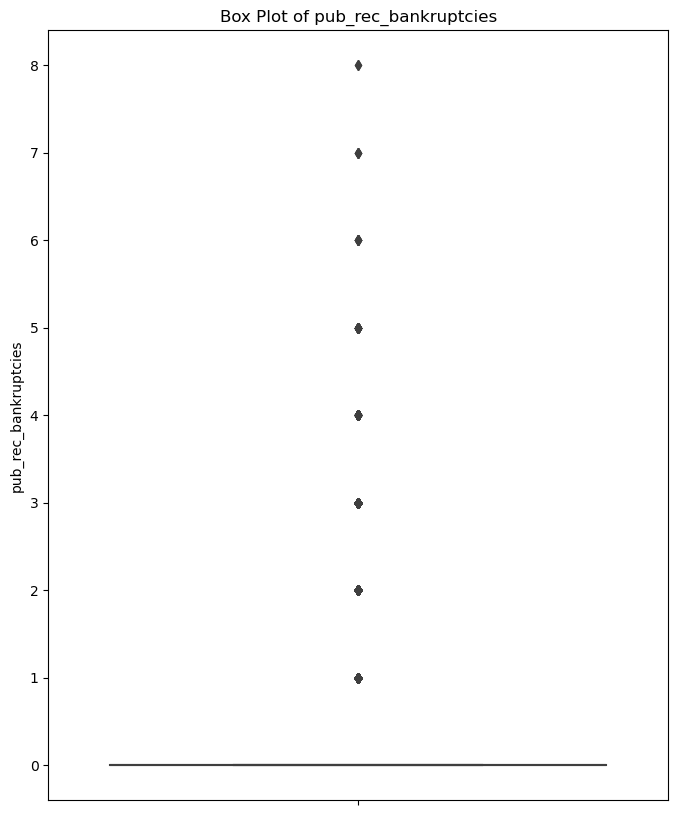

In [36]:
# Box Plot for pub_rec_bankruptcies
plt.figure(figsize=(8, 10))
sns.boxplot(y=data['pub_rec_bankruptcies'])
plt.title('Box Plot of pub_rec_bankruptcies')
plt.show()

outliers are observed in teh features:
1. loan amount: Upper whisker value for loan_amnt: 38000.0; There were 192 records which were higher than upper whisher; upper outliers are capped at 38000.0

2. interest rate: Upper whisker value for int_rate: 25.489999999999995; There were 3777 records which had interest rate higher than upper whisker (amounting to less than 1% of total number of records); these outliers have been capped at upper whisker limit.

3. annual income: 16700 records (which accounts for 4.21% of total number of records) out of 396030 records had income above upper whisker (Upper whisker value for annual_inc: 157500.0); These outliers have been capped at upper whisker.

4. 'dti' feature: 276 records had value above upper whisker (which accounts for 0.069% of total number of records); Upper whisker value for dti: 40.53; these outliers have been capped at upper whisker value;

5. 'revol_util' feature: 12 records had value above upper whisker (just around 0.003% of records); Upper whisker value for revol_util: 128.40000000000003; outliers have been capped at upper whisker

6. 'revol_bal' feature: 21260 records had values above upper whisker (5.4% of total number of records); Upper whisker value for revol_bal: 40012.5; these outliers have been capped at upper whisker;

7. 'pub_rec'feature: Upper whisker value for pub_rec: 0.0; so outlier treatment is not performed on this feature;

8. 'mort_acc': 6843 records had value above upper whisker(1.73% of total records); Upper whisker value for mort_acc: 7.5; outliers have beencapped at upper whisker value;

9. 'pub_rec_bankruptcies': Upper whisker value for pub_rec_bankruptcies: 0.0; No outlier treatment done for this feature;



In [37]:
# Function to calculate the upper whisker value and cap the column
def cap_column(data, column_name):
    # Calculate the IQR for the column
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the upper whisker value
    upper_whisker = Q3 + 1.5 * IQR
    print(f'Upper whisker value for {column_name}: {upper_whisker}')

    # Cap the column values at the upper whisker value
    data[column_name] = data[column_name].apply(lambda x: min(x, upper_whisker))

    return data


Upper whisker value for loan_amnt: 38000.0


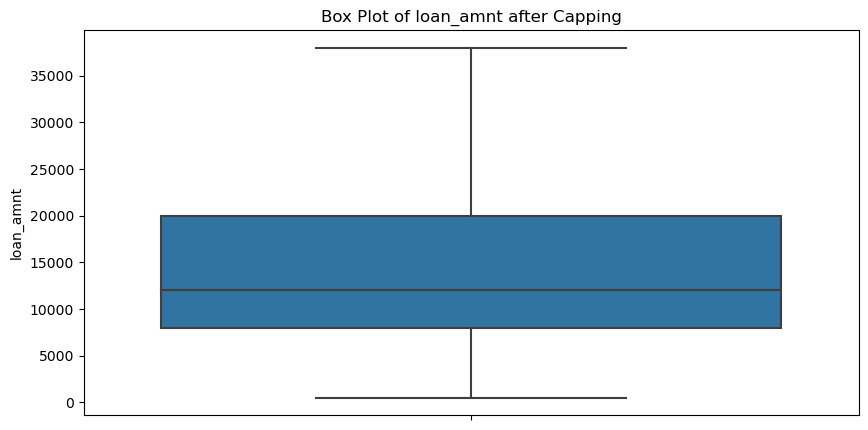

In [38]:
# Cap the loan_amnt column
data = cap_column(data, 'loan_amnt')

# Verify the capping for loan_amnt
plt.figure(figsize=(10, 5))
sns.boxplot(y=data['loan_amnt'])
plt.title('Box Plot of loan_amnt after Capping')
plt.show()



Upper whisker value for int_rate: 25.489999999999995


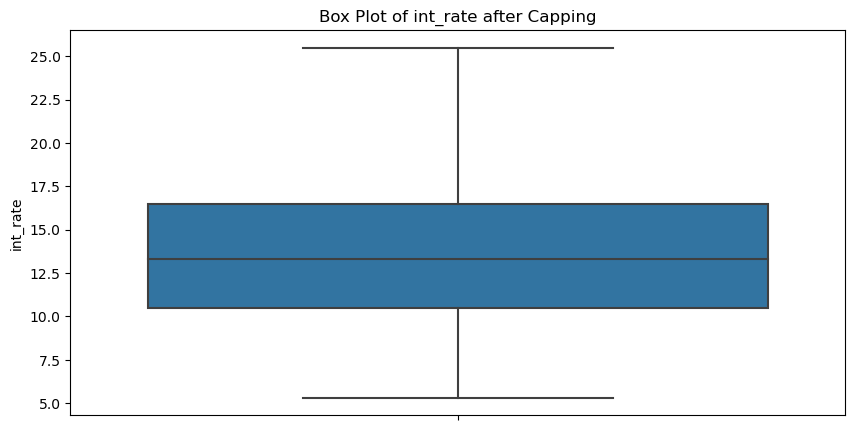

In [39]:
# Cap the int_rate column
data = cap_column(data, 'int_rate')

# Verify the capping for int_rate
plt.figure(figsize=(10, 5))
sns.boxplot(y=data['int_rate'])
plt.title('Box Plot of int_rate after Capping')
plt.show()

Upper whisker value for annual_inc: 157500.0


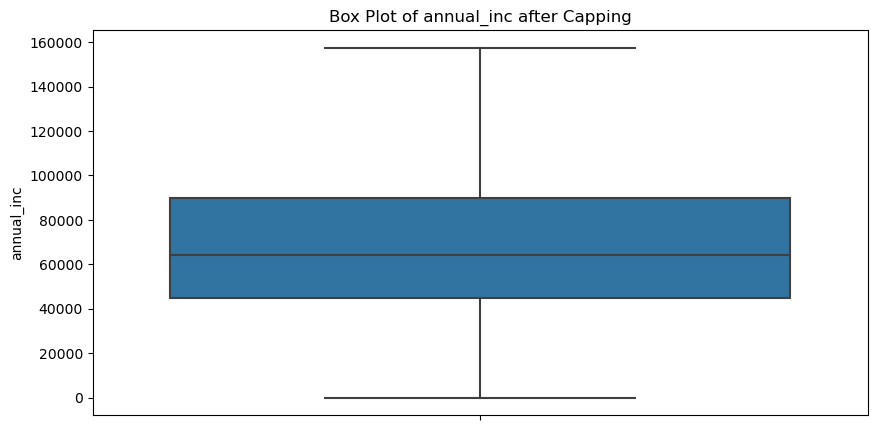

In [40]:
# Cap the int_rate column
data = cap_column(data, 'annual_inc')

# Verify the capping for int_rate
plt.figure(figsize=(10, 5))
sns.boxplot(y=data['annual_inc'])
plt.title('Box Plot of annual_inc after Capping')
plt.show()

Upper whisker value for dti: 40.53


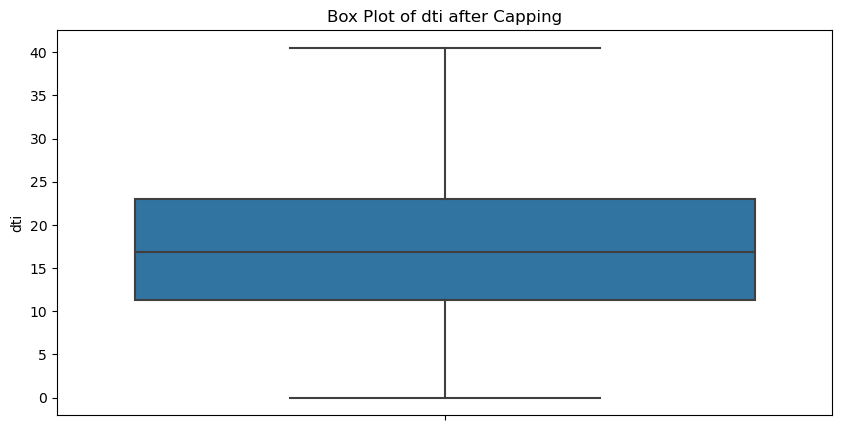

In [41]:
# Cap the int_rate column
data = cap_column(data, 'dti')

# Verify the capping for int_rate
plt.figure(figsize=(10, 5))
sns.boxplot(y=data['dti'])
plt.title('Box Plot of dti after Capping')
plt.show()

Upper whisker value for revol_util: 128.40000000000003


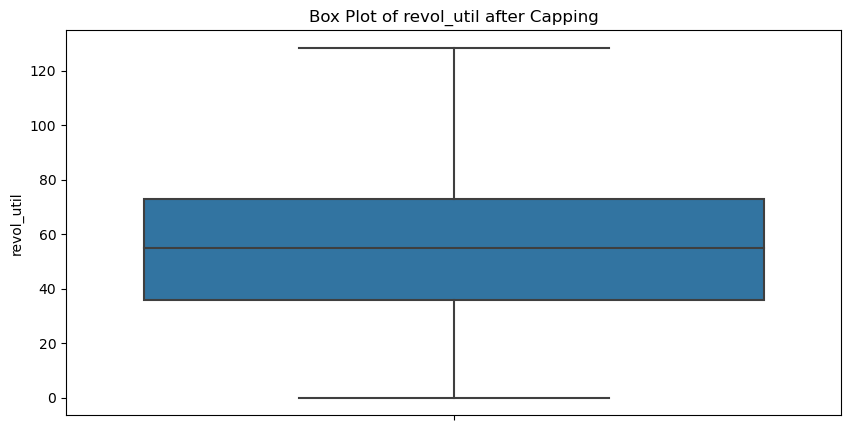

In [42]:
# Cap the int_rate column
data = cap_column(data, 'revol_util')

# Verify the capping for int_rate
plt.figure(figsize=(10, 5))
sns.boxplot(y=data['revol_util'])
plt.title('Box Plot of revol_util after Capping')
plt.show()

Upper whisker value for revol_bal: 40012.5


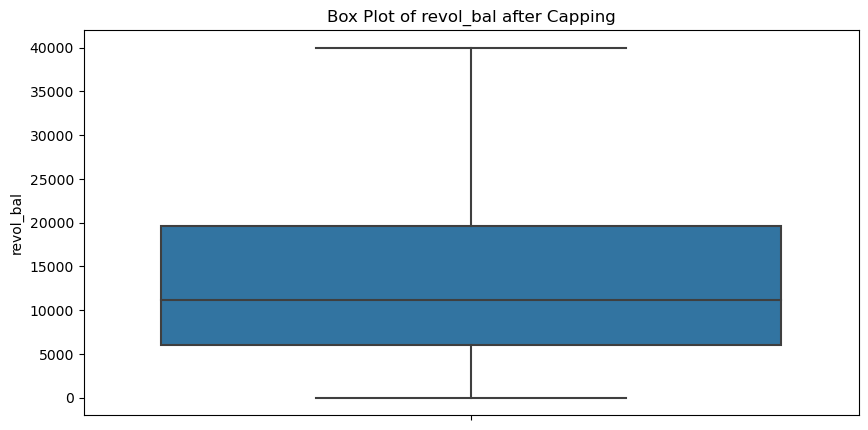

In [43]:
# Cap the int_rate column
data = cap_column(data, 'revol_bal')

# Verify the capping for int_rate
plt.figure(figsize=(10, 5))
sns.boxplot(y=data['revol_bal'])
plt.title('Box Plot of revol_bal after Capping')
plt.show()

In [44]:
# Cap the int_rate column
# data = cap_column(data, 'pub_rec')

# # Verify the capping for int_rate
# plt.figure(figsize=(10, 5))
# sns.boxplot(y=data['pub_rec'])
# plt.title('Box Plot of pub_rec after Capping')
# plt.show()

Upper whisker value for annual_inc: 157500.0


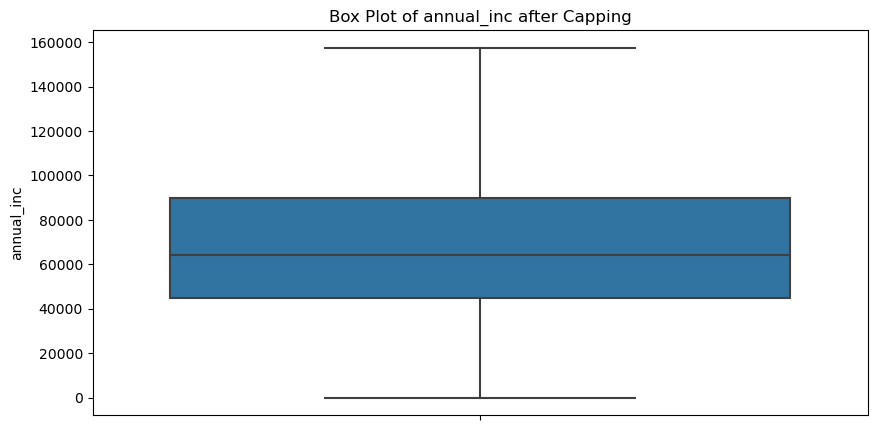

In [45]:
# Cap the int_rate column
data = cap_column(data, 'annual_inc')

# Verify the capping for int_rate
plt.figure(figsize=(10, 5))
sns.boxplot(y=data['annual_inc'])
plt.title('Box Plot of annual_inc after Capping')
plt.show()

Upper whisker value for mort_acc: 7.5


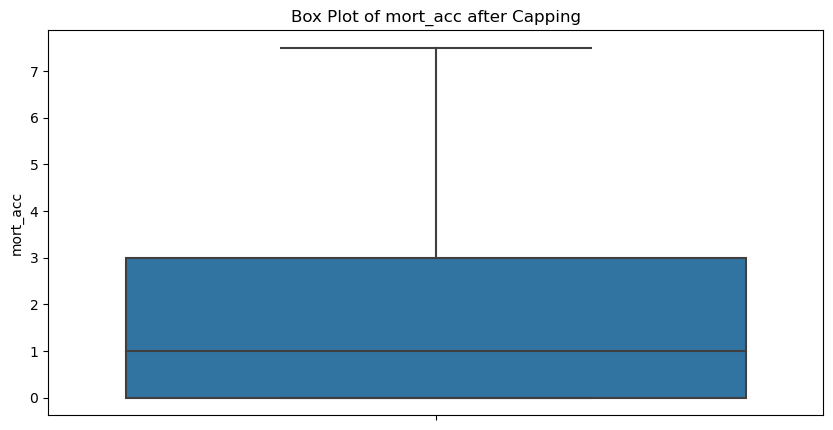

In [46]:
# Cap the mort_acc column
data = cap_column(data, 'mort_acc')

# Verify the capping for int_rate
plt.figure(figsize=(10, 5))
sns.boxplot(y=data['mort_acc'])
plt.title('Box Plot of mort_acc after Capping')
plt.show()

In [47]:
# Cap the pub_rec_bankruptcies column
# data = cap_column(data, 'pub_rec_bankruptcies')

# # Verify the capping for int_rate
# plt.figure(figsize=(10, 5))
# sns.boxplot(y=data['pub_rec_bankruptcies'])
# plt.title('Box Plot of pub_rec_bankruptcies after Capping')
# plt.show()

In [48]:
# Encoding categorical features; (I know label encoding is not teh best solution; still doing label encoding);
label_enc = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_enc.fit_transform(data[col])

In [49]:
data.head(100)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status
0,10000.0,36,11.44,329.48,1,8,80954,15.0,5,117000.0,...,0,36369.0,41.8,25,1,1,0.0,0.0,6206,1
1,8000.0,36,11.99,265.68,1,9,33315,4.0,1,65000.0,...,0,20131.0,53.3,27,0,1,3.0,0.0,38135,1
2,15600.0,36,10.49,506.97,1,7,127180,0.5,5,43057.0,...,0,11987.0,92.2,26,0,1,0.0,0.0,307942,1
3,7200.0,36,6.49,220.65,0,1,27758,6.0,5,54000.0,...,0,5472.0,21.5,13,0,1,0.0,0.0,291181,1
4,24375.0,60,17.27,609.33,2,14,38298,9.0,1,55000.0,...,0,24584.0,69.8,43,0,1,1.0,0.0,240127,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,30000.0,36,16.49,1061.99,3,17,119041,15.0,5,101000.0,...,1,6080.0,76.0,15,0,1,2.0,1.0,89118,1
96,12625.0,60,25.49,376.36,5,29,90717,7.0,1,43000.0,...,0,19993.0,55.7,31,1,1,1.0,0.0,184345,1
97,13400.0,60,25.49,399.86,6,31,35074,15.0,1,56000.0,...,0,28845.0,84.5,44,1,1,6.0,0.0,11531,0
98,24250.0,60,18.64,624.27,4,20,70364,15.0,1,46200.0,...,0,18894.0,90.0,22,0,1,1.0,0.0,260793,1


1. emp_title feature has as many as 154014 unique values; 'title' feature has as manay as 41300 unique values; I am not sure whether to include these as input features...  


In [50]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(columns=['loan_status']))
scaled_data = pd.DataFrame(scaled_features, columns=data.columns[:-1])

In [51]:
scaled_features

array([[-0.49229525, -0.55797482, -0.4926014 , ..., -0.88408443,
        -0.34128219, -1.67965479],
       [-0.73168298, -0.55797482, -0.36894742, ...,  0.67231603,
        -0.34128219, -1.39987276],
       [ 0.17799041, -0.55797482, -0.70618555, ..., -0.88408443,
        -0.34128219,  0.96434622],
       ...,
       [-1.09076458, -0.55797482, -0.81859826, ..., -0.88408443,
        -0.34128219,  1.22103871],
       [ 0.82433728,  1.79219555,  0.37747299, ...,  1.70991634,
        -0.34128219,  0.69757671],
       [-1.44984618, -0.55797482, -0.00473023, ..., -0.36528428,
        -0.34128219,  0.70621666]])

In [52]:
scaled_data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,-0.492295,-0.557975,-0.492601,-0.408291,-0.616534,-0.467127,-0.202748,1.346345,1.091067,1.340611,...,0.912646,-0.335785,2.073028,-0.491273,-0.034891,1.227636,-0.008284,-0.884084,-0.341282,-1.679655
1,-0.731683,-0.557975,-0.368947,-0.662750,-0.616534,-0.315634,-1.162649,-0.647643,-0.987638,-0.174517,...,1.107287,-0.335785,0.556785,-0.020083,0.133361,-0.814574,-0.008284,0.672316,-0.341282,-1.399873
2,0.177990,-0.557975,-0.706186,0.299609,-0.616534,-0.618620,0.728682,-1.282094,1.091067,-0.813871,...,0.328720,-0.335785,-0.203671,1.573770,0.049235,-0.814574,-0.008284,-0.884084,-0.341282,0.964346
3,-0.827438,-0.557975,-1.605487,-0.842348,-1.366267,-1.527580,-1.274620,-0.285100,1.091067,-0.495024,...,-1.033772,-0.335785,-0.812017,-1.323026,-1.044399,-0.814574,-0.008284,-0.884084,-0.341282,0.817476
4,1.228304,1.792196,0.818131,0.707861,0.133200,0.441833,-1.062244,0.258715,-0.987638,-0.465887,...,0.328720,-0.335785,0.972589,0.655973,1.479372,-0.814574,-0.008284,-0.365284,-0.341282,0.370108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,-0.492295,1.792196,-0.593773,-0.855390,-0.616534,-0.467127,1.397323,-1.010186,1.091067,-0.902943,...,-1.033772,-0.335785,-1.137153,-0.798571,-0.203142,1.227636,-0.008284,-0.884084,-0.341282,-1.332304
396026,0.824337,-0.557975,-0.301500,1.071164,0.133200,-0.164140,-1.717526,-0.466371,-0.987638,1.136651,...,-1.033772,-0.335785,2.413244,1.717175,-1.465027,-0.814574,-0.008284,-0.365284,-0.341282,-1.698126
396027,-1.090765,-0.557975,-0.818598,-1.078979,-0.616534,-0.921607,-1.307141,1.346345,1.091067,-0.422182,...,0.718004,-0.335785,1.730804,0.537151,-0.203142,-0.814574,-0.008284,-0.884084,-0.341282,1.221039
396028,0.824337,1.792196,0.377473,0.283855,0.133200,-0.012647,-0.691252,1.346345,-0.987638,-0.203654,...,-0.449847,-0.335785,0.143408,0.000404,-0.455519,-0.814574,-0.008284,1.709916,-0.341282,0.697577


In [53]:
# Splitting the data
X = scaled_data
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,-0.492295,-0.557975,-0.492601,-0.408291,-0.616534,-0.467127,-0.202748,1.346345,1.091067,1.340611,...,0.912646,-0.335785,2.073028,-0.491273,-0.034891,1.227636,-0.008284,-0.884084,-0.341282,-1.679655
1,-0.731683,-0.557975,-0.368947,-0.662750,-0.616534,-0.315634,-1.162649,-0.647643,-0.987638,-0.174517,...,1.107287,-0.335785,0.556785,-0.020083,0.133361,-0.814574,-0.008284,0.672316,-0.341282,-1.399873
2,0.177990,-0.557975,-0.706186,0.299609,-0.616534,-0.618620,0.728682,-1.282094,1.091067,-0.813871,...,0.328720,-0.335785,-0.203671,1.573770,0.049235,-0.814574,-0.008284,-0.884084,-0.341282,0.964346
3,-0.827438,-0.557975,-1.605487,-0.842348,-1.366267,-1.527580,-1.274620,-0.285100,1.091067,-0.495024,...,-1.033772,-0.335785,-0.812017,-1.323026,-1.044399,-0.814574,-0.008284,-0.884084,-0.341282,0.817476
4,1.228304,1.792196,0.818131,0.707861,0.133200,0.441833,-1.062244,0.258715,-0.987638,-0.465887,...,0.328720,-0.335785,0.972589,0.655973,1.479372,-0.814574,-0.008284,-0.365284,-0.341282,0.370108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,-0.492295,1.792196,-0.593773,-0.855390,-0.616534,-0.467127,1.397323,-1.010186,1.091067,-0.902943,...,-1.033772,-0.335785,-1.137153,-0.798571,-0.203142,1.227636,-0.008284,-0.884084,-0.341282,-1.332304
396026,0.824337,-0.557975,-0.301500,1.071164,0.133200,-0.164140,-1.717526,-0.466371,-0.987638,1.136651,...,-1.033772,-0.335785,2.413244,1.717175,-1.465027,-0.814574,-0.008284,-0.365284,-0.341282,-1.698126
396027,-1.090765,-0.557975,-0.818598,-1.078979,-0.616534,-0.921607,-1.307141,1.346345,1.091067,-0.422182,...,0.718004,-0.335785,1.730804,0.537151,-0.203142,-0.814574,-0.008284,-0.884084,-0.341282,1.221039
396028,0.824337,1.792196,0.377473,0.283855,0.133200,-0.012647,-0.691252,1.346345,-0.987638,-0.203654,...,-0.449847,-0.335785,0.143408,0.000404,-0.455519,-0.814574,-0.008284,1.709916,-0.341282,0.697577


In [55]:
y

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 396030, dtype: int32

In [56]:
y.value_counts()

loan_status
1    318357
0     77673
Name: count, dtype: int64

In [57]:
y.value_counts(normalize=True)*100
# around 80% of the data is of 'fully paid' and only 20 % data is of 'charged off'; This is imbalanced dataset; 
# But in this ipynb, no attempt has been made to balance the data

loan_status
1    80.387092
0    19.612908
Name: proportion, dtype: float64

In [58]:
# model 01
# Adding a constant to the model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Training the logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# Summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.449207
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               316824
Model:                          Logit   Df Residuals:                   316797
Method:                           MLE   Df Model:                           26
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                 0.09214
Time:                        12:25:18   Log-Likelihood:            -1.4232e+05
converged:                       True   LL-Null:                   -1.5676e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.5827      0.005    308.878      0.000       1.573       1.593

In [59]:
from sklearn.metrics import classification_report

# Predictions
y_pred = result.predict(X_test)
y_pred_class = [1 if x > 0.5 else 0 for x in y_pred]

# Classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.51      0.08      0.15     15577
           1       0.81      0.98      0.89     63629

    accuracy                           0.80     79206
   macro avg       0.66      0.53      0.52     79206
weighted avg       0.76      0.80      0.74     79206



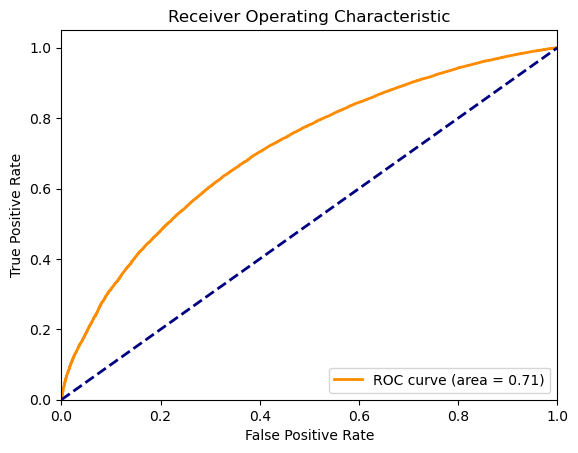

In [60]:
from sklearn.metrics import roc_curve, auc

# ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

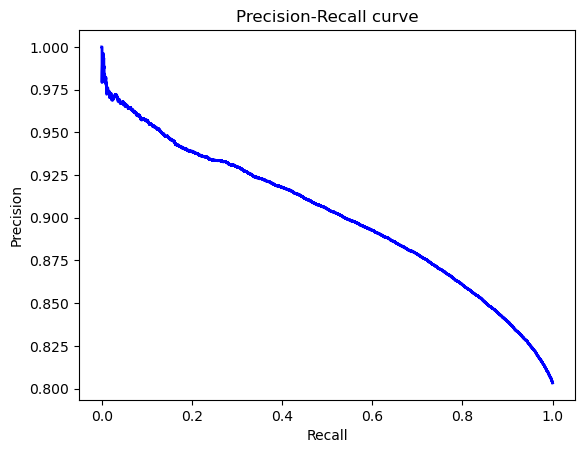

In [61]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

In [62]:
# model 02 ( 'address' is dropped from features as P=0.975)

In [63]:
X_train.drop(columns=['address'], inplace=True)
X_test.drop(columns=['address'], inplace=True)


In [64]:
X_train

,const,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
320024,1.0,1.303113,-0.557975,-1.178319,1.420149,-1.366267,-1.073100,-0.229527,-0.828914,1.091067,...,-0.893364,-0.449847,-0.335785,0.352478,-0.683846,-0.287268,1.227636,-0.008284,1.191116,-0.341282
282427,1.0,-0.252908,-0.557975,-1.290732,-0.225024,-1.366267,-1.073100,-1.459270,-1.010186,-0.987638,...,1.107320,0.523362,-0.335785,0.826549,-0.306894,0.385738,1.227636,-0.008284,0.672316,-0.341282
103275,1.0,1.087664,1.792196,0.080703,0.430189,0.133200,0.290340,0.542179,1.346345,-0.987638,...,-0.606846,0.523362,1.548625,1.783655,-0.011888,1.311120,1.227636,-0.008284,0.153516,-0.341282
199642,1.0,0.321623,1.792196,0.377473,-0.117417,0.133200,-0.012647,-1.076651,-0.647643,-0.987638,...,1.072741,0.328720,-0.335785,-0.330009,0.758406,1.226995,-0.814574,-0.008284,0.153516,-0.341282
56027,1.0,0.465256,-0.557975,-1.708907,0.462615,-1.366267,-1.679074,-0.099180,-0.647643,1.091067,...,0.786223,-0.644489,7.201857,2.130921,0.274924,-1.128525,1.227636,-0.008284,-0.884084,-0.341282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,1.0,0.704643,-0.557975,0.080703,1.003521,0.133200,0.290340,1.303547,-0.828914,-0.987638,...,-0.666126,-0.839131,-0.335785,-0.283601,0.836255,-0.455519,1.227636,-0.008284,-0.365284,-0.341282
365838,1.0,1.901582,1.792196,2.095139,1.647248,2.382401,2.108260,-0.708359,-1.282094,1.091067,...,-1.728218,-0.644489,-0.335785,0.346035,1.569672,-0.960273,-0.814574,-0.008284,-0.884084,-0.341282
131932,1.0,0.177990,-0.557975,-0.319486,0.350461,-0.616534,-0.315634,-0.142441,-0.103828,1.091067,...,1.082621,-0.255205,-0.335785,0.226513,0.061864,0.049235,-0.814574,-0.008284,-0.365284,-0.341282
146867,1.0,1.246258,-0.557975,0.788904,1.771845,0.882934,1.047807,-0.214697,-0.647643,1.091067,...,-1.466400,0.328720,1.548625,-0.179673,-0.733014,-0.455519,-0.814574,-0.008284,0.672316,2.468013


In [65]:
X_test

,const,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
362323,1.0,-0.013520,1.792196,0.193116,-0.408889,0.133200,0.290340,1.431073,1.346345,-0.987638,...,-0.359848,-0.255205,-0.335785,-0.181634,0.406037,-0.792022,1.227636,-0.008284,0.153516,-0.341282
220444,1.0,-0.965086,-0.557975,0.597802,-0.870585,0.882934,0.744820,1.601336,-1.010186,0.571390,...,0.277407,-0.060563,-0.335785,-1.082341,-1.659005,-0.119016,-0.814574,-0.008284,-0.884084,-0.341282
345899,1.0,0.797406,-0.557975,1.036211,1.283147,0.882934,1.199300,-1.462816,-1.010186,1.091067,...,0.020529,-0.449847,-0.335785,0.719353,-0.708430,-1.296776,-0.814574,-0.008284,-0.884084,-0.341282
93811,1.0,-0.971071,-0.557975,0.080703,-0.904606,0.133200,0.290340,0.054722,-1.191458,1.091067,...,-0.962524,1.107287,7.201857,-0.681197,-0.638776,0.301612,-0.814574,-0.008284,1.709916,8.086602
182096,1.0,0.399424,-0.557975,-0.117143,0.626339,-0.616534,-0.467127,0.160124,0.077444,-0.987638,...,-1.491099,-0.060563,-0.335785,1.530326,-0.245434,0.469864,-0.814574,-0.008284,-0.365284,-0.341282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251207,1.0,0.704643,-0.557975,0.487637,1.074156,0.133200,0.138847,-1.190758,1.346345,1.091067,...,0.405846,-1.033772,5.317446,-0.304424,1.344321,-1.212650,1.227636,-0.008284,-0.884084,2.468013
289440,1.0,-0.516234,-0.557975,-1.335697,-0.503135,-1.366267,-1.224594,-1.675716,-0.647643,1.091067,...,-0.004171,-0.839131,-0.335785,-0.254748,0.414232,-1.044399,-0.814574,-0.008284,-0.884084,-0.341282
320783,1.0,-0.276846,-0.557975,-0.117143,-0.134248,0.133200,-0.012647,0.812605,-0.466371,1.091067,...,0.781283,1.301929,1.548625,-0.131118,-0.388840,0.301612,-0.814574,-0.008284,-0.365284,2.468013
341659,1.0,1.303113,1.792196,-1.290732,0.294145,-1.366267,-1.073100,0.437462,-0.466371,-0.987638,...,0.000769,-0.644489,-0.335785,0.730371,-0.130710,0.217486,1.227636,-0.008284,0.153516,-0.341282


In [66]:
# Training the logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# Summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.449207
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               316824
Model:                          Logit   Df Residuals:                   316798
Method:                           MLE   Df Model:                           25
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                 0.09214
Time:                        12:25:23   Log-Likelihood:            -1.4232e+05
converged:                       True   LL-Null:                   -1.5676e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.5827      0.005    308.879      0.000       1.573       1.593

In [67]:
# Predictions
y_pred = result.predict(X_test)
y_pred_class = [1 if x > 0.5 else 0 for x in y_pred]

# Classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.51      0.08      0.15     15577
           1       0.81      0.98      0.89     63629

    accuracy                           0.80     79206
   macro avg       0.66      0.53      0.52     79206
weighted avg       0.76      0.80      0.74     79206



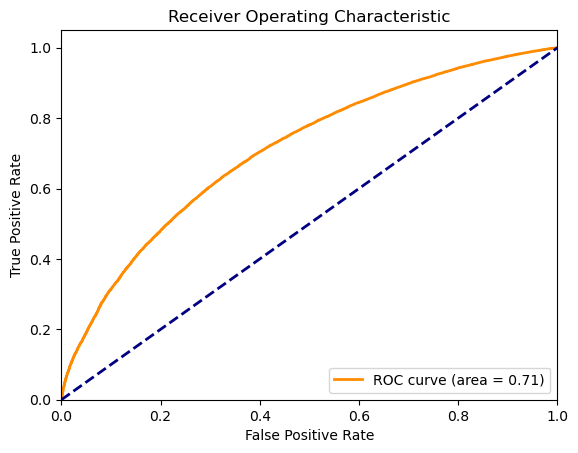

In [68]:
# ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

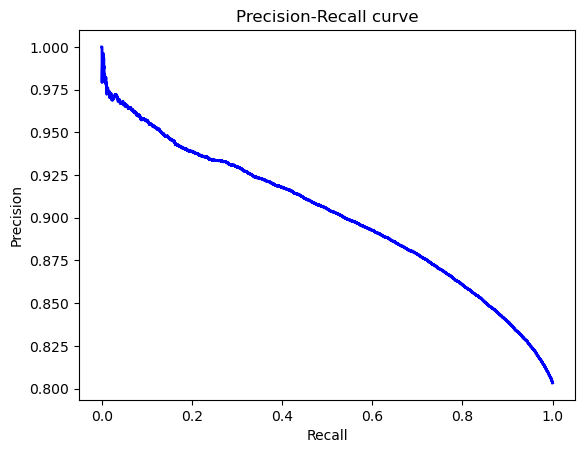

In [69]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

In [70]:
# model 03 ('issue_d' feature is dropped as P=0.751)

In [71]:
X_train.drop(columns=['issue_d'], inplace=True)
X_test.drop(columns=['issue_d'], inplace=True)

In [72]:
X_train

,const,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
320024,1.0,1.303113,-0.557975,-1.178319,1.420149,-1.366267,-1.073100,-0.229527,-0.828914,1.091067,...,-0.893364,-0.449847,-0.335785,0.352478,-0.683846,-0.287268,1.227636,-0.008284,1.191116,-0.341282
282427,1.0,-0.252908,-0.557975,-1.290732,-0.225024,-1.366267,-1.073100,-1.459270,-1.010186,-0.987638,...,1.107320,0.523362,-0.335785,0.826549,-0.306894,0.385738,1.227636,-0.008284,0.672316,-0.341282
103275,1.0,1.087664,1.792196,0.080703,0.430189,0.133200,0.290340,0.542179,1.346345,-0.987638,...,-0.606846,0.523362,1.548625,1.783655,-0.011888,1.311120,1.227636,-0.008284,0.153516,-0.341282
199642,1.0,0.321623,1.792196,0.377473,-0.117417,0.133200,-0.012647,-1.076651,-0.647643,-0.987638,...,1.072741,0.328720,-0.335785,-0.330009,0.758406,1.226995,-0.814574,-0.008284,0.153516,-0.341282
56027,1.0,0.465256,-0.557975,-1.708907,0.462615,-1.366267,-1.679074,-0.099180,-0.647643,1.091067,...,0.786223,-0.644489,7.201857,2.130921,0.274924,-1.128525,1.227636,-0.008284,-0.884084,-0.341282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,1.0,0.704643,-0.557975,0.080703,1.003521,0.133200,0.290340,1.303547,-0.828914,-0.987638,...,-0.666126,-0.839131,-0.335785,-0.283601,0.836255,-0.455519,1.227636,-0.008284,-0.365284,-0.341282
365838,1.0,1.901582,1.792196,2.095139,1.647248,2.382401,2.108260,-0.708359,-1.282094,1.091067,...,-1.728218,-0.644489,-0.335785,0.346035,1.569672,-0.960273,-0.814574,-0.008284,-0.884084,-0.341282
131932,1.0,0.177990,-0.557975,-0.319486,0.350461,-0.616534,-0.315634,-0.142441,-0.103828,1.091067,...,1.082621,-0.255205,-0.335785,0.226513,0.061864,0.049235,-0.814574,-0.008284,-0.365284,-0.341282
146867,1.0,1.246258,-0.557975,0.788904,1.771845,0.882934,1.047807,-0.214697,-0.647643,1.091067,...,-1.466400,0.328720,1.548625,-0.179673,-0.733014,-0.455519,-0.814574,-0.008284,0.672316,2.468013


In [73]:
X_test

,const,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
362323,1.0,-0.013520,1.792196,0.193116,-0.408889,0.133200,0.290340,1.431073,1.346345,-0.987638,...,-0.359848,-0.255205,-0.335785,-0.181634,0.406037,-0.792022,1.227636,-0.008284,0.153516,-0.341282
220444,1.0,-0.965086,-0.557975,0.597802,-0.870585,0.882934,0.744820,1.601336,-1.010186,0.571390,...,0.277407,-0.060563,-0.335785,-1.082341,-1.659005,-0.119016,-0.814574,-0.008284,-0.884084,-0.341282
345899,1.0,0.797406,-0.557975,1.036211,1.283147,0.882934,1.199300,-1.462816,-1.010186,1.091067,...,0.020529,-0.449847,-0.335785,0.719353,-0.708430,-1.296776,-0.814574,-0.008284,-0.884084,-0.341282
93811,1.0,-0.971071,-0.557975,0.080703,-0.904606,0.133200,0.290340,0.054722,-1.191458,1.091067,...,-0.962524,1.107287,7.201857,-0.681197,-0.638776,0.301612,-0.814574,-0.008284,1.709916,8.086602
182096,1.0,0.399424,-0.557975,-0.117143,0.626339,-0.616534,-0.467127,0.160124,0.077444,-0.987638,...,-1.491099,-0.060563,-0.335785,1.530326,-0.245434,0.469864,-0.814574,-0.008284,-0.365284,-0.341282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251207,1.0,0.704643,-0.557975,0.487637,1.074156,0.133200,0.138847,-1.190758,1.346345,1.091067,...,0.405846,-1.033772,5.317446,-0.304424,1.344321,-1.212650,1.227636,-0.008284,-0.884084,2.468013
289440,1.0,-0.516234,-0.557975,-1.335697,-0.503135,-1.366267,-1.224594,-1.675716,-0.647643,1.091067,...,-0.004171,-0.839131,-0.335785,-0.254748,0.414232,-1.044399,-0.814574,-0.008284,-0.884084,-0.341282
320783,1.0,-0.276846,-0.557975,-0.117143,-0.134248,0.133200,-0.012647,0.812605,-0.466371,1.091067,...,0.781283,1.301929,1.548625,-0.131118,-0.388840,0.301612,-0.814574,-0.008284,-0.365284,2.468013
341659,1.0,1.303113,1.792196,-1.290732,0.294145,-1.366267,-1.073100,0.437462,-0.466371,-0.987638,...,0.000769,-0.644489,-0.335785,0.730371,-0.130710,0.217486,1.227636,-0.008284,0.153516,-0.341282


In [74]:
# Training the logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# Summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.449208
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               316824
Model:                          Logit   Df Residuals:                   316799
Method:                           MLE   Df Model:                           24
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                 0.09214
Time:                        12:25:28   Log-Likelihood:            -1.4232e+05
converged:                       True   LL-Null:                   -1.5676e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.5827      0.005    308.879      0.000       1.573       1.593

In [75]:
# Predictions
y_pred = result.predict(X_test)
y_pred_class = [1 if x > 0.5 else 0 for x in y_pred]

# Classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.51      0.08      0.15     15577
           1       0.81      0.98      0.89     63629

    accuracy                           0.80     79206
   macro avg       0.66      0.53      0.52     79206
weighted avg       0.76      0.80      0.74     79206



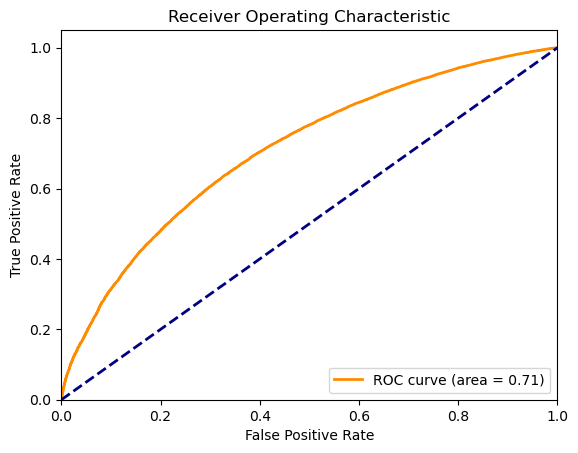

In [76]:
# ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

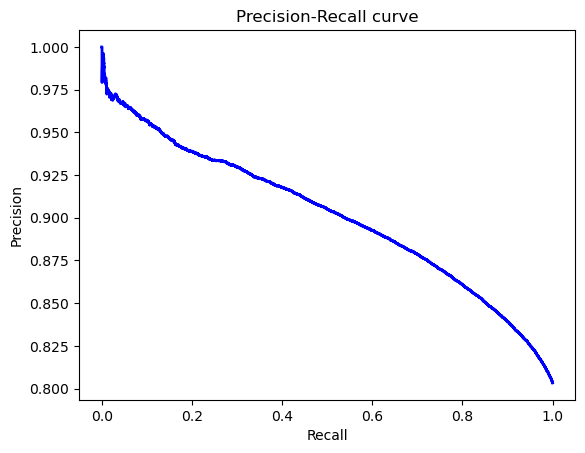

In [77]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

In [78]:
# model 04 ('grade' feature is dropped as P=0.532)

In [79]:
X_train.drop(columns=['grade'], inplace=True)
X_test.drop(columns=['grade'], inplace=True)

In [80]:
X_train

,const,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
320024,1.0,1.303113,-0.557975,-1.178319,1.420149,-1.073100,-0.229527,-0.828914,1.091067,0.408224,...,-0.893364,-0.449847,-0.335785,0.352478,-0.683846,-0.287268,1.227636,-0.008284,1.191116,-0.341282
282427,1.0,-0.252908,-0.557975,-1.290732,-0.225024,-1.073100,-1.459270,-1.010186,-0.987638,1.544570,...,1.107320,0.523362,-0.335785,0.826549,-0.306894,0.385738,1.227636,-0.008284,0.672316,-0.341282
103275,1.0,1.087664,1.792196,0.080703,0.430189,0.290340,0.542179,1.346345,-0.987638,2.010763,...,-0.606846,0.523362,1.548625,1.783655,-0.011888,1.311120,1.227636,-0.008284,0.153516,-0.341282
199642,1.0,0.321623,1.792196,0.377473,-0.117417,-0.012647,-1.076651,-0.647643,-0.987638,0.320813,...,1.072741,0.328720,-0.335785,-0.330009,0.758406,1.226995,-0.814574,-0.008284,0.153516,-0.341282
56027,1.0,0.465256,-0.557975,-1.708907,0.462615,-1.679074,-0.099180,-0.647643,1.091067,2.520662,...,0.786223,-0.644489,7.201857,2.130921,0.274924,-1.128525,1.227636,-0.008284,-0.884084,-0.341282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,1.0,0.704643,-0.557975,0.080703,1.003521,0.290340,1.303547,-0.828914,-0.987638,-0.320202,...,-0.666126,-0.839131,-0.335785,-0.283601,0.836255,-0.455519,1.227636,-0.008284,-0.365284,-0.341282
365838,1.0,1.901582,1.792196,2.095139,1.647248,2.108260,-0.708359,-1.282094,1.091067,2.520662,...,-1.728218,-0.644489,-0.335785,0.346035,1.569672,-0.960273,-0.814574,-0.008284,-0.884084,-0.341282
131932,1.0,0.177990,-0.557975,-0.319486,0.350461,-0.315634,-0.142441,-0.103828,1.091067,-0.611573,...,1.082621,-0.255205,-0.335785,0.226513,0.061864,0.049235,-0.814574,-0.008284,-0.365284,-0.341282
146867,1.0,1.246258,-0.557975,0.788904,1.771845,1.047807,-0.214697,-0.647643,1.091067,0.029443,...,-1.466400,0.328720,1.548625,-0.179673,-0.733014,-0.455519,-0.814574,-0.008284,0.672316,2.468013


In [81]:
X_test

,const,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
362323,1.0,-0.013520,1.792196,0.193116,-0.408889,0.290340,1.431073,1.346345,-0.987638,0.262539,...,-0.359848,-0.255205,-0.335785,-0.181634,0.406037,-0.792022,1.227636,-0.008284,0.153516,-0.341282
220444,1.0,-0.965086,-0.557975,0.597802,-0.870585,0.744820,1.601336,-1.010186,0.571390,-1.474030,...,0.277407,-0.060563,-0.335785,-1.082341,-1.659005,-0.119016,-0.814574,-0.008284,-0.884084,-0.341282
345899,1.0,0.797406,-0.557975,1.036211,1.283147,1.199300,-1.462816,-1.010186,1.091067,-0.174517,...,0.020529,-0.449847,-0.335785,0.719353,-0.708430,-1.296776,-0.814574,-0.008284,-0.884084,-0.341282
93811,1.0,-0.971071,-0.557975,0.080703,-0.904606,0.290340,0.054722,-1.191458,1.091067,-0.936509,...,-0.962524,1.107287,7.201857,-0.681197,-0.638776,0.301612,-0.814574,-0.008284,1.709916,8.086602
182096,1.0,0.399424,-0.557975,-0.117143,0.626339,-0.467127,0.160124,0.077444,-0.987638,-0.174517,...,-1.491099,-0.060563,-0.335785,1.530326,-0.245434,0.469864,-0.814574,-0.008284,-0.365284,-0.341282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251207,1.0,0.704643,-0.557975,0.487637,1.074156,0.138847,-1.190758,1.346345,1.091067,0.699595,...,0.405846,-1.033772,5.317446,-0.304424,1.344321,-1.212650,1.227636,-0.008284,-0.884084,2.468013
289440,1.0,-0.516234,-0.557975,-1.335697,-0.503135,-1.224594,-1.675716,-0.647643,1.091067,0.087717,...,-0.004171,-0.839131,-0.335785,-0.254748,0.414232,-1.044399,-0.814574,-0.008284,-0.884084,-0.341282
320783,1.0,-0.276846,-0.557975,-0.117143,-0.134248,-0.012647,0.812605,-0.466371,1.091067,0.145991,...,0.781283,1.301929,1.548625,-0.131118,-0.388840,0.301612,-0.814574,-0.008284,-0.365284,2.468013
341659,1.0,1.303113,1.792196,-1.290732,0.294145,-1.073100,0.437462,-0.466371,-0.987638,1.136651,...,0.000769,-0.644489,-0.335785,0.730371,-0.130710,0.217486,1.227636,-0.008284,0.153516,-0.341282


In [82]:
# Training the logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# Summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.449208
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               316824
Model:                          Logit   Df Residuals:                   316800
Method:                           MLE   Df Model:                           23
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                 0.09214
Time:                        12:25:33   Log-Likelihood:            -1.4232e+05
converged:                       True   LL-Null:                   -1.5676e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.5827      0.005    308.891      0.000       1.573       1.593

In [83]:
# Predictions
y_pred = result.predict(X_test)
y_pred_class = [1 if x > 0.5 else 0 for x in y_pred]

# Classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.51      0.08      0.15     15577
           1       0.81      0.98      0.89     63629

    accuracy                           0.80     79206
   macro avg       0.66      0.53      0.52     79206
weighted avg       0.76      0.80      0.74     79206



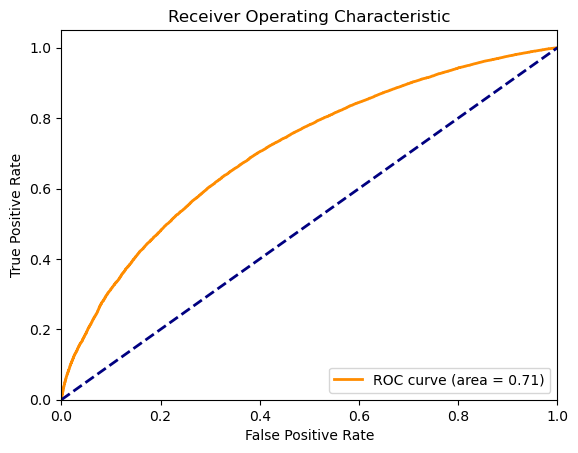

In [84]:
# ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

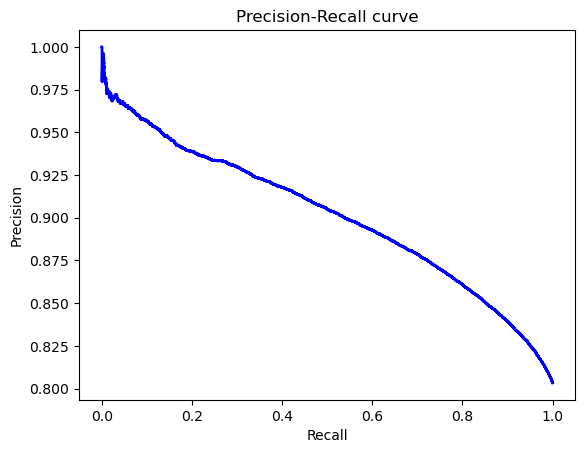

In [85]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

In [86]:
# model 05 ('initial_list_status' feature is dropped as P=0.499)

In [87]:
X_train.drop(columns=['initial_list_status'], inplace=True)
X_test.drop(columns=['initial_list_status'], inplace=True)

In [88]:
X_train

,const,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies
320024,1.0,1.303113,-0.557975,-1.178319,1.420149,-1.073100,-0.229527,-0.828914,1.091067,0.408224,...,-0.778153,-0.893364,-0.449847,-0.335785,0.352478,-0.683846,-0.287268,-0.008284,1.191116,-0.341282
282427,1.0,-0.252908,-0.557975,-1.290732,-0.225024,-1.073100,-1.459270,-1.010186,-0.987638,1.544570,...,-0.804033,1.107320,0.523362,-0.335785,0.826549,-0.306894,0.385738,-0.008284,0.672316,-0.341282
103275,1.0,1.087664,1.792196,0.080703,0.430189,0.290340,0.542179,1.346345,-0.987638,2.010763,...,-0.258101,-0.606846,0.523362,1.548625,1.783655,-0.011888,1.311120,-0.008284,0.153516,-0.341282
199642,1.0,0.321623,1.792196,0.377473,-0.117417,-0.012647,-1.076651,-0.647643,-0.987638,0.320813,...,-0.382569,1.072741,0.328720,-0.335785,-0.330009,0.758406,1.226995,-0.008284,0.153516,-0.341282
56027,1.0,0.465256,-0.557975,-1.708907,0.462615,-1.679074,-0.099180,-0.647643,1.091067,2.520662,...,-0.622877,0.786223,-0.644489,7.201857,2.130921,0.274924,-1.128525,-0.008284,-0.884084,-0.341282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,1.0,0.704643,-0.557975,0.080703,1.003521,0.290340,1.303547,-0.828914,-0.987638,-0.320202,...,-1.383238,-0.666126,-0.839131,-0.335785,-0.283601,0.836255,-0.455519,-0.008284,-0.365284,-0.341282
365838,1.0,1.901582,1.792196,2.095139,1.647248,2.108260,-0.708359,-1.282094,1.091067,2.520662,...,-1.506473,-1.728218,-0.644489,-0.335785,0.346035,1.569672,-0.960273,-0.008284,-0.884084,-0.341282
131932,1.0,0.177990,-0.557975,-0.319486,0.350461,-0.315634,-0.142441,-0.103828,1.091067,-0.611573,...,-1.637102,1.082621,-0.255205,-0.335785,0.226513,0.061864,0.049235,-0.008284,-0.365284,-0.341282
146867,1.0,1.246258,-0.557975,0.788904,1.771845,1.047807,-0.214697,-0.647643,1.091067,0.029443,...,1.812248,-1.466400,0.328720,1.548625,-0.179673,-0.733014,-0.455519,-0.008284,0.672316,2.468013


In [89]:
X_test

,const,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies
362323,1.0,-0.013520,1.792196,0.193116,-0.408889,0.290340,1.431073,1.346345,-0.987638,0.262539,...,-0.037511,-0.359848,-0.255205,-0.335785,-0.181634,0.406037,-0.792022,-0.008284,0.153516,-0.341282
220444,1.0,-0.965086,-0.557975,0.597802,-0.870585,0.744820,1.601336,-1.010186,0.571390,-1.474030,...,1.323004,0.277407,-0.060563,-0.335785,-1.082341,-1.659005,-0.119016,-0.008284,-0.884084,-0.341282
345899,1.0,0.797406,-0.557975,1.036211,1.283147,1.199300,-1.462816,-1.010186,1.091067,-0.174517,...,-0.251940,0.020529,-0.449847,-0.335785,0.719353,-0.708430,-1.296776,-0.008284,-0.884084,-0.341282
93811,1.0,-0.971071,-0.557975,0.080703,-0.904606,0.290340,0.054722,-1.191458,1.091067,-0.936509,...,-0.092966,-0.962524,1.107287,7.201857,-0.681197,-0.638776,0.301612,-0.008284,1.709916,8.086602
182096,1.0,0.399424,-0.557975,-0.117143,0.626339,-0.467127,0.160124,0.077444,-0.987638,-0.174517,...,-0.651221,-1.491099,-0.060563,-0.335785,1.530326,-0.245434,0.469864,-0.008284,-0.365284,-0.341282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251207,1.0,0.704643,-0.557975,0.487637,1.074156,0.138847,-1.190758,1.346345,1.091067,0.699595,...,-0.091734,0.405846,-1.033772,5.317446,-0.304424,1.344321,-1.212650,-0.008284,-0.884084,2.468013
289440,1.0,-0.516234,-0.557975,-1.335697,-0.503135,-1.224594,-1.675716,-0.647643,1.091067,0.087717,...,-0.346831,-0.004171,-0.839131,-0.335785,-0.254748,0.414232,-1.044399,-0.008284,-0.884084,-0.341282
320783,1.0,-0.276846,-0.557975,-0.117143,-0.134248,-0.012647,0.812605,-0.466371,1.091067,0.145991,...,0.379024,0.781283,1.301929,1.548625,-0.131118,-0.388840,0.301612,-0.008284,-0.365284,2.468013
341659,1.0,1.303113,1.792196,-1.290732,0.294145,-1.073100,0.437462,-0.466371,-0.987638,1.136651,...,0.149807,0.000769,-0.644489,-0.335785,0.730371,-0.130710,0.217486,-0.008284,0.153516,-0.341282


In [90]:
# Training the logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# Summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.449209
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               316824
Model:                          Logit   Df Residuals:                   316801
Method:                           MLE   Df Model:                           22
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                 0.09214
Time:                        12:25:38   Log-Likelihood:            -1.4232e+05
converged:                       True   LL-Null:                   -1.5676e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.5827      0.005    308.901      0.000       1.573       1.593

In [91]:
# Predictions
y_pred = result.predict(X_test)
y_pred_class = [1 if x > 0.5 else 0 for x in y_pred]

# Classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.51      0.08      0.15     15577
           1       0.81      0.98      0.89     63629

    accuracy                           0.80     79206
   macro avg       0.66      0.53      0.52     79206
weighted avg       0.76      0.80      0.74     79206



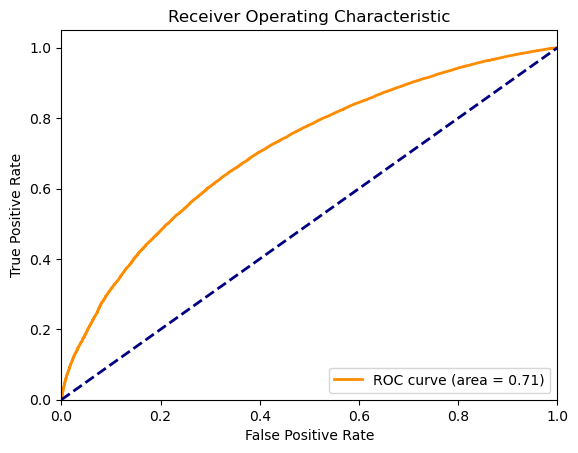

In [92]:
# ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

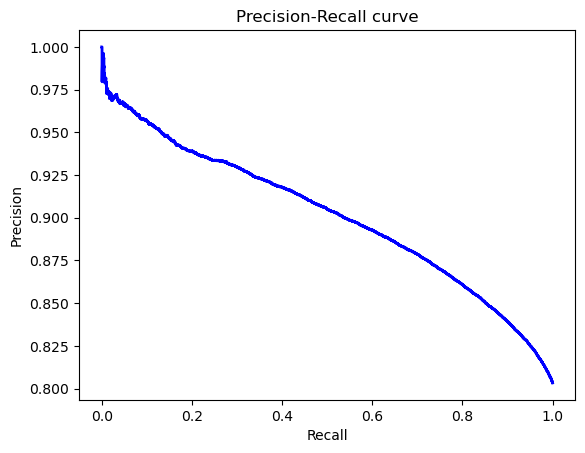

In [93]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

In [94]:
# model 06 ('earliest_cr_line' feature is dropped as P=0.466)

In [95]:
X_train.drop(columns=['earliest_cr_line'], inplace=True)
X_test.drop(columns=['earliest_cr_line'], inplace=True)

In [96]:
X_train

,const,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies
320024,1.0,1.303113,-0.557975,-1.178319,1.420149,-1.073100,-0.229527,-0.828914,1.091067,0.408224,...,-0.418950,-0.778153,-0.449847,-0.335785,0.352478,-0.683846,-0.287268,-0.008284,1.191116,-0.341282
282427,1.0,-0.252908,-0.557975,-1.290732,-0.225024,-1.073100,-1.459270,-1.010186,-0.987638,1.544570,...,-0.418950,-0.804033,0.523362,-0.335785,0.826549,-0.306894,0.385738,-0.008284,0.672316,-0.341282
103275,1.0,1.087664,1.792196,0.080703,0.430189,0.290340,0.542179,1.346345,-0.987638,2.010763,...,-0.685597,-0.258101,0.523362,1.548625,1.783655,-0.011888,1.311120,-0.008284,0.153516,-0.341282
199642,1.0,0.321623,1.792196,0.377473,-0.117417,-0.012647,-1.076651,-0.647643,-0.987638,0.320813,...,-0.195586,-0.382569,0.328720,-0.335785,-0.330009,0.758406,1.226995,-0.008284,0.153516,-0.341282
56027,1.0,0.465256,-0.557975,-1.708907,0.462615,-1.679074,-0.099180,-0.647643,1.091067,2.520662,...,-0.418950,-0.622877,-0.644489,7.201857,2.130921,0.274924,-1.128525,-0.008284,-0.884084,-0.341282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,1.0,0.704643,-0.557975,0.080703,1.003521,0.290340,1.303547,-0.828914,-0.987638,-0.320202,...,-0.418950,-1.383238,-0.839131,-0.335785,-0.283601,0.836255,-0.455519,-0.008284,-0.365284,-0.341282
365838,1.0,1.901582,1.792196,2.095139,1.647248,2.108260,-0.708359,-1.282094,1.091067,2.520662,...,1.702279,-1.506473,-0.644489,-0.335785,0.346035,1.569672,-0.960273,-0.008284,-0.884084,-0.341282
131932,1.0,0.177990,-0.557975,-0.319486,0.350461,-0.315634,-0.142441,-0.103828,1.091067,-0.611573,...,-0.550828,-1.637102,-0.255205,-0.335785,0.226513,0.061864,0.049235,-0.008284,-0.365284,-0.341282
146867,1.0,1.246258,-0.557975,0.788904,1.771845,1.047807,-0.214697,-0.647643,1.091067,0.029443,...,-0.418950,1.812248,0.328720,1.548625,-0.179673,-0.733014,-0.455519,-0.008284,0.672316,2.468013


In [97]:
X_test

,const,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies
362323,1.0,-0.013520,1.792196,0.193116,-0.408889,0.290340,1.431073,1.346345,-0.987638,0.262539,...,-0.418950,-0.037511,-0.255205,-0.335785,-0.181634,0.406037,-0.792022,-0.008284,0.153516,-0.341282
220444,1.0,-0.965086,-0.557975,0.597802,-0.870585,0.744820,1.601336,-1.010186,0.571390,-1.474030,...,-0.418950,1.323004,-0.060563,-0.335785,-1.082341,-1.659005,-0.119016,-0.008284,-0.884084,-0.341282
345899,1.0,0.797406,-0.557975,1.036211,1.283147,1.199300,-1.462816,-1.010186,1.091067,-0.174517,...,1.001533,-0.251940,-0.449847,-0.335785,0.719353,-0.708430,-1.296776,-0.008284,-0.884084,-0.341282
93811,1.0,-0.971071,-0.557975,0.080703,-0.904606,0.290340,0.054722,-1.191458,1.091067,-0.936509,...,-0.685597,-0.092966,1.107287,7.201857,-0.681197,-0.638776,0.301612,-0.008284,1.709916,8.086602
182096,1.0,0.399424,-0.557975,-0.117143,0.626339,-0.467127,0.160124,0.077444,-0.987638,-0.174517,...,1.805140,-0.651221,-0.060563,-0.335785,1.530326,-0.245434,0.469864,-0.008284,-0.365284,-0.341282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251207,1.0,0.704643,-0.557975,0.487637,1.074156,0.138847,-1.190758,1.346345,1.091067,0.699595,...,2.295537,-0.091734,-1.033772,5.317446,-0.304424,1.344321,-1.212650,-0.008284,-0.884084,2.468013
289440,1.0,-0.516234,-0.557975,-1.335697,-0.503135,-1.224594,-1.675716,-0.647643,1.091067,0.087717,...,-0.418950,-0.346831,-0.839131,-0.335785,-0.254748,0.414232,-1.044399,-0.008284,-0.884084,-0.341282
320783,1.0,-0.276846,-0.557975,-0.117143,-0.134248,-0.012647,0.812605,-0.466371,1.091067,0.145991,...,0.413481,0.379024,1.301929,1.548625,-0.131118,-0.388840,0.301612,-0.008284,-0.365284,2.468013
341659,1.0,1.303113,1.792196,-1.290732,0.294145,-1.073100,0.437462,-0.466371,-0.987638,1.136651,...,-0.418950,0.149807,-0.644489,-0.335785,0.730371,-0.130710,0.217486,-0.008284,0.153516,-0.341282


In [98]:
# Training the logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# Summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.449210
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               316824
Model:                          Logit   Df Residuals:                   316802
Method:                           MLE   Df Model:                           21
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                 0.09214
Time:                        12:25:44   Log-Likelihood:            -1.4232e+05
converged:                       True   LL-Null:                   -1.5676e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.5827      0.005    308.901      0.000       1.573       1.593

In [99]:
# Predictions
y_pred = result.predict(X_test)
y_pred_class = [1 if x > 0.5 else 0 for x in y_pred]

# Classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.51      0.08      0.15     15577
           1       0.81      0.98      0.89     63629

    accuracy                           0.80     79206
   macro avg       0.66      0.53      0.52     79206
weighted avg       0.76      0.80      0.74     79206



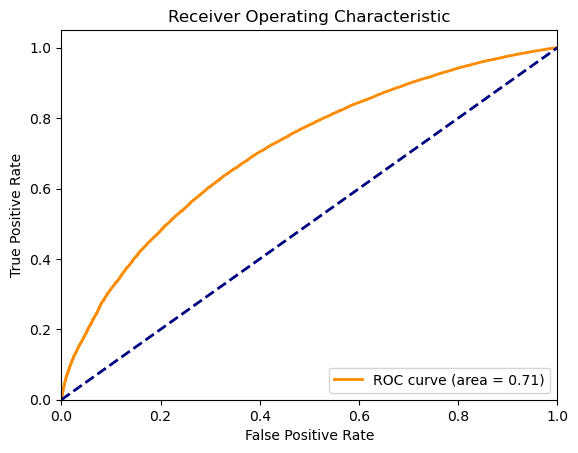

In [100]:
# ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

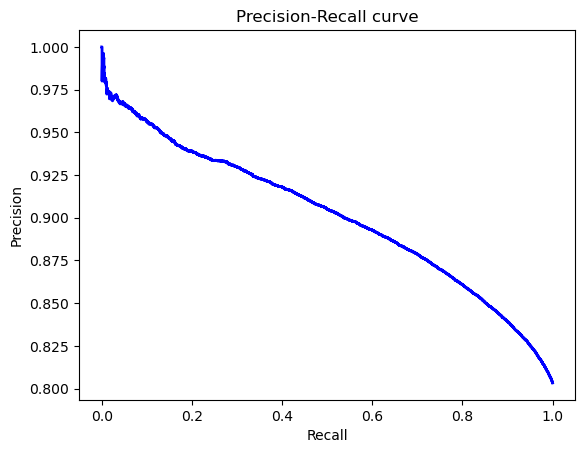

In [101]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

###  Features in the order of their importance:

feature	abs(weights)
sub_grade	0.7274
int_rate	0.2791
annual_inc	0.2734
term	0.2047
open_acc	0.1712
revol_util	0.1433
installment	0.1191
emp_title	0.1139
home_ownership	0.1093
total_acc	0.0642
pub_rec	0.0585
mort_acc	0.0538
verification_status	0.0527
revol_bal	0.0417
pub_rec_bankruptcies	0.0315
purpose	0.0277
title	0.0257
emp_length	0.0195
application_type	0.0172
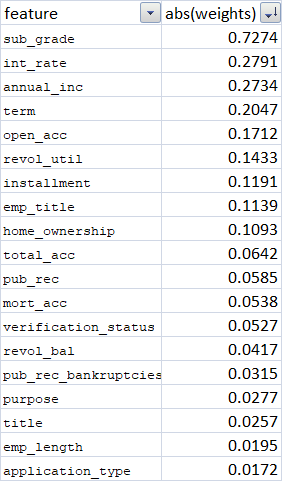


### probably something went wrong seriously...

### data is imbalanced; no attempt has been made to balance the data in this ipynb

### model performs well for class 1 with precision= 81%, recall= 98%, F1 score=89%; however model perform poorly for class 0 with precision= 51% recall=09%  F1 score= 15% (this could be due to imbalanced data)


### overall accuracy of around 80% is observed (heavily influenced by majority class)

### What percentage of customers have fully paid their Loan Amount? (around 80%)



### The majority of people have home ownership as mortgage (~ 50% of people) and rent (around 40% of people).

### Impact of high recall and low precision ( as seen in the majority class):  model aggressively flags many loans as potential defaults, even if many of these predictions are false. minor class's scores are poor. 

### sub-grade, int-rate and term are the features that impact outcomes heavily





# using sklearn logisticRegression()

In [102]:
# Initialize logistic regression model with class weights
model = LogisticRegression(class_weight='balanced', random_state=42)


In [103]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [104]:
# Predict on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_class = model.predict(X_test)

In [105]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_class))


Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.64      0.43     15577
           1       0.88      0.67      0.76     63629

    accuracy                           0.66     79206
   macro avg       0.60      0.65      0.59     79206
weighted avg       0.77      0.66      0.70     79206



In [106]:
from sklearn.metrics import confusion_matrix,roc_auc_score, roc_curve, precision_recall_curve, precision_score, recall_score, f1_score

In [107]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 9910  5667]
 [20936 42693]]


In [108]:
# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'AU ROC Score: {roc_auc:.2f}')

AU ROC Score: 0.71


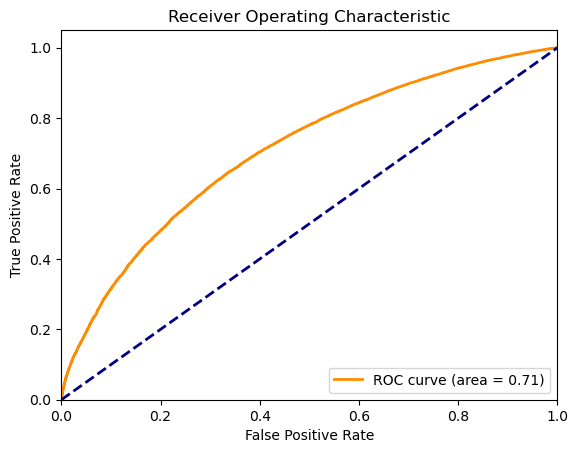

In [109]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

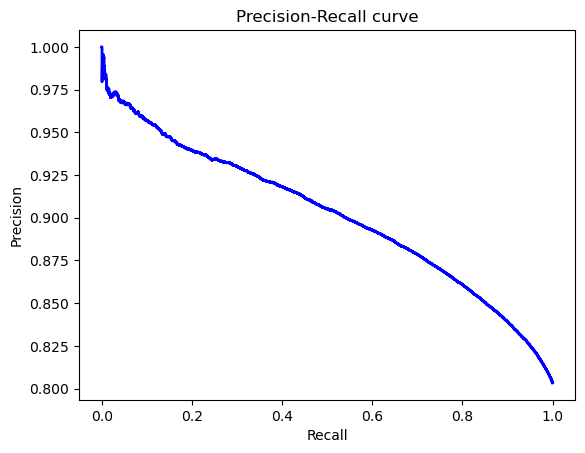

In [110]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

In [111]:
# Additional metrics
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.88
Recall: 0.67
F1 Score: 0.76


### precision, recall and F1 score have improved after using class_weight='balanced'